In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scikit-learn --user

Requirement already up-to-date: scikit-learn in c:\users\user\appdata\roaming\python\python37\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm
import warnings

from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import median_absolute_error as medae
from sklearn.metrics import r2_score

In [101]:
#suppress warnings
warnings.filterwarnings("ignore")

In [160]:
#Classification of Top-100 German cities (A - very good; B - good; C - normal; D - simple) 
cityClassification = {'A':['Berlin', 'Hamburg', 'München', 'Köln', 
                           'Frankfurt', 'Stuttgart', 'Düsseldorf'], 
                      'B':['Dortmund', 'Essen', 'Dresden', 'Bremen', 
                           'Hannover', 'Nürnberg', 'Leipzig', 'Duisburg', 
                           'Bochum', 'Bonn', 'Münster', 'Karlsruhe', 
                           'Mannheim', 'Wiesbaden'],
                      'C':['Wuppertal', 'Bielefeld', 'Augsburg', 'Mönchengladbach',
                           'Braunschweig', 'Kiel', 'Aachen', 'Magdeburg',
                           'Freiburg im Breisgau', 'Lübeck', 'Rostock', 'Mainz',
                           'Saarbrücken', 'Potsdam', 'Erfurt', 'Mülheim an der Ruhr', 'Osnabrück',
                           'Heidelberg', 'Darmstadt', 'Regensburg', 'Offenbach am Main',
                           'Erlangen', 'Esslingen am Neckar', 'Ludwigsburg', 'Konstanz'],
                      'D':['Gelsenkirchen', 'Chemnitz', 'Halle', 'Krefeld',
                           'Oberhausen', 'Kassel', 'Hagen', 'Hamm', 'Ludwigshafen am Rhein', 
                           'Oldenburg', 'Leverkusen', 'Solingen', 'Herne', 'Neuss',
                           'Paderborn', 'Ingolstadt', 'Würzburg', 'Fürth', 'Ulm',
                           'Heilbronn', 'Pforzheim', 'Wolfsburg', 'Göttingen', 
                           'Bottrop', 'Reutlingen', 'Koblenz', 'Bremerhaven',
                           'Recklinghausen', 'Bergisch Gladbach', 'Jena', 'Remscheid',
                           'Trier', 'Salzgitter', 'Moers', 'Siegen', 'Hildesheim',
                           'Cottbus', 'Gütersloh', 'Kaiserslautern', 'Witten', 'Hanau', 
                           'Gera', 'Iserlohn', 'Düren', 'Tübingen', 'Flensburg',
                           'Zwickau', 'Gießen', 'Ratingen', 'Lünen', 'Villingen-Schwenningen',
                           'Marl','Worms', 'Schwerin']} 

#Vacancy rates in german cities (amont of not rented / not used flats)
#Data taken from E&V market report and Zensus 2022
leer       = {'Berlin':[0.8], 'Hamburg':[0.4], 'München':[0.2], 'Köln':[1.0],
              'Frankfurt am Main':[0.3], 'Stuttgart':[0.6], 'Düsseldorf':[1.4], 'Dortmund':[2.5],
              'Essen':[3.0], 'Dresden':[1.6], 'Bremen':[1.8], 'Hannover':[1.7],
              'Nürnberg':[0.9], 'Leipzig':[2.5], 'Duisburg':[4.3], 'Bochum':[2.7],
              'Bonn':[0.9], 'Münster':[0.7], 'Karlsruhe':[0.7], 'Mannheim':[1.3], 
              'Wiesbaden':[1.7], 'Wuppertal':[2.9], 'Bielefeld':[2.3], 'Augsburg':[0.6],
              'Mönchengladbach':[3.5], 'Braunschweig':[1.8], 'Kiel':[1.4], 'Aachen':[2.3], 
              'Magdeburg':[5.2], 'Freiburg im Breisgau':[0.3], 'Lübeck':[1.4], 'Rostock':[2.6],
              'Mainz':[0.7], 'Saarbrücken':[4.1], 'Potsdam':[0.5], 'Erfurt':[2.2], 
              'Mülheim an der Ruhr':[2.3], 'Osnabrück':[1.6], 'Heidelberg':[0.7], 'Darmstadt':[0.7],
              'Regensburg':[0.7], 'Offenbach am Main':[0.6], 'Erlangen':[1.5], 'Esslingen am Neckar':[1.0],
              'Ludwigsburg':[1.1], 'Konstanz':[1.0], 'Gelsenkirchen':[4.7], 'Chemnitz':[9.0], 
              'Halle':[3.5], 'Krefeld':[5.2], 'Oberhausen':[4.0], 'Kassel':[2.5], 
              'Hagen':[5.0], 'Hamm':[5.0], 'Ludwigshafen am Rhein':[1.1], 'Oldenburg':[0.6], 
              'Leverkusen':[1.5], 'Solingen':[3.8], 'Herne':[4.8], 'Neuss':[2.2], 'Paderborn':[2.9], 
              'Ingolstadt':[1.0], 'Würzburg':[1.8], 'Fürth':[1.5], 'Ulm':[1.8], 'Heilbronn':[1.9], 
              'Pforzheim':[1.4], 'Wolfsburg':[1.7], 'Göttingen':[3.6],  'Bottrop':[4.0], 'Reutlingen':[1.7], 
              'Koblenz':[3.6], 'Bremerhaven':[6.6], 'Recklinghausen':[2.7], 'Bergisch Gladbach':[1.5], 'Jena':[1.0], 
              'Remscheid':[2.9], 'Trier':[2.0], 'Salzgitter':[8.4], 'Moers':[4.3], 'Siegen':[3.5], 'Hildesheim':[2.4], 
              'Cottbus':[4.3], 'Gütersloh':[2.6], 'Kaiserslautern':[2.5], 'Witten':[5.0], 'Hanau':[2.5],  'Gera':[7.7], 
              'Iserlohn':[5.0], 'Düren':[3.0], 'Tübingen':[1.7], 'Flensburg':[2.2], 'Zwickau':[13.0], 'Gießen':[2.5], 
              'Ratingen':[2.2], 'Lünen':[5.0], 'Villingen-Schwenningen':[1.8], 'Marl':[2.9], 'Worms':[1.9], 'Schwerin':[7.5]}

#Mean sqm in german cities (the most of the data taken from E&V market report and partly from collective experience 
#of me and colleges) 
sqm_german = {'Berlin':[2500], 'Hamburg':[3750], 'München':[6000], 'Köln':[2550],
              'Frankfurt am Main':[3250], 'Stuttgart':[2950], 'Düsseldorf':[2675], 'Dortmund':[1275],
              'Essen':[1150], 'Dresden':[1975], 'Bremen':[1675], 'Hannover':[1950],
              'Nürnberg':[2350], 'Leipzig':[1750], 'Duisburg':[1050], 'Bochum':[1250], 
              'Bonn':[1900], 'Münster':[2100], 'Karlsruhe':[2375], 'Mannheim':[2150], 
              'Wiesbaden':[2250], 'Wuppertal':[1125], 'Bielefeld':[1550], 'Augsburg':[3000],
              'Mönchengladbach':[1200], 'Braunschweig':[1600], 'Kiel':[2500], 'Aachen':[1550], 
              'Magdeburg':[1060], 'Freiburg im Breisgau':[3500], 'Lübeck':[1625], 'Rostock':[2150],
              'Mainz':[2325], 'Saarbrücken':[1250], 'Potsdam':[2250], 'Erfurt':[1800], 
              'Mülheim an der Ruhr':[1220], 'Osnabrück':[2100], 'Heidelberg':[3450], 'Darmstadt':[2325],
              'Regensburg':[3175], 'Offenbach am Main':[1750], 'Erlangen':[1850], 'Esslingen am Neckar':[2250],
              'Ludwigsburg':[2150], 'Konstanz':[3250], 'Gelsenkirchen':[850], 'Chemnitz':[800],
              'Halle':[1450], 'Krefeld':[1175], 'Oberhausen':[950], 'Kassel':[1475], 
              'Hagen':[975], 'Hamm':[975], 'Ludwigshafen am Rhein':[1750], 'Oldenburg':[1900], 
              'Leverkusen':[1350], 'Solingen':[1075], 'Herne':[800], 'Neuss':[1725], 'Paderborn':[1650], 
              'Ingolstadt':[2550], 'Würzburg':[2450], 'Fürth':[1850], 'Ulm':[1950], 'Heilbronn':[1950], 
              'Pforzheim':[1800], 'Wolfsburg':[1800], 'Göttingen':[2100],  'Bottrop':[950], 'Reutlingen':[1800], 
              'Koblenz':[2200], 'Bremerhaven':[925], 'Recklinghausen':[1100], 'Bergisch Gladbach':[1750], 'Jena':[1925], 
              'Remscheid':[1125], 'Trier':[1650], 'Salzgitter':[1200], 'Moers':[1050], 'Siegen':[1150], 'Hildesheim':[1200], 
              'Cottbus':[1000], 'Gütersloh':[1100], 'Kaiserslautern':[1450], 'Witten':[975], 'Hanau':[1800],  'Gera':[950], 
              'Iserlohn':[975], 'Düren':[1100], 'Tübingen':[1800], 'Flensburg':[2200], 'Zwickau':[775], 'Gießen':[1475], 
              'Ratingen':[1725], 'Lünen':[975], 'Villingen-Schwenningen':[1650], 
              'Marl':[1050], 'Worms':[1750], 'Schwerin':[1100]}

#Valuations with some anomalies related to the issues of the evaluation itself
#These objects were identified using the function "checkWrong", after it, each object
#were analysed manually by checking the corresponding Excel files
badValuations = ['Beerenstraße 32, 14163 Berlin', 'Sandberg 33, 04178 Leipzig', 'Moorfleeter Deich 133-135, 22113 Hamburg', 
                 'Lipper Weg 66, 45770 Marl', 'Am Vorwerk 6, 22113 Hamburg', 'Südostalle 155 - 167, 12487 Berlin', 
                 'Storchenweg 4, 04356 Leipzig', 'Emil-von-Stromer-Platz 4, 90518 Altdorf bei Nürnberg', 
                 'Fürth 11, 4707 Fürth', 'Osterfelder Straße 145, 46242 Bottrop', 'Bahnhofstraße 69, 66125 Saarbrücken', 
                 'Lobsingerstraße 16, 90419 Nürnberg', 'Laasener Straße 38, 07546 Gera', 'Wetterauerstrasse 14, 42897 Remscheid', 
                 'Leusbergstraße 15, 45663 Recklinghausen', 'Max-Hufschmidt-Str. 4, 55130 Mainz', 'Wolfhager Straße 83, 34127 Kassel', 
                 'Schlossstr. 57, 33739 Bielefeld', 'Brühlstraße 13, 75175 Pforzheim', 'Böblinger Straße 440, 70569 Stuttgart', 
                 'Weserstraße 206, 12047 Berlin', 'Untere Hauptstraße 152, 09228 Chemnitz', 'Georg-Schumann-Straße 216, 4159 Leipzig', 
                 'Ackerstraße 40, 13585 Berlin', 'Mitteisstraße 31, 80935 München', 'Schloßhofstraße 36, 33615 Bielefeld', 
                 'Weserstraße 206, 12047 Berlin', 'Köhlstraße 23, 65205 Wiesbaden', 'Lange Straße 48, 58089 Hagen', 
                 'Nadorster Str. 133, 26123 Oldenburg', 'Schwerter Straße 239, 58099 Hagen', 'Mondstraße 5, 90762 Fürth', 
                 'Wanner Straße 44, 45888 Gelsenkirchen', 'Kaiser-Wilhelm-Straße 24, 45476 Mülheim an der Ruhr', 
                 'Triftstraße 19, 49090 Osnabrück', 'Remscheider Straße 74, 42659 Solingen', 'Am Deimelsberg 5, 45276 Essen', 
                 'Auf dem Graskamp 43, 45888 Gelsenkirchen', 'Burger Heerstraße 28A, 28719 Bremen', 'Bernatzikstraße 6, 81929 München', 
                 'Hartmannstraße 4 und 6, 30559 Hannover', 'Gravelottestraße 48, 47053 Duisburg', 'Rottbrede 12, 49076 Osnabrück', 
                 'Simrockstraße 167, 22589 Hamburg', 'Eichenborndamm 78, 13403 Berlin', 'Kanzlerstraße 56, 9112 Chemnitz', 
                 'Südstraße 21, 52351 Düren', 'Herner Straße 16, 45886 Gelsenkirchen', 'Moorfleeter Deich 102, 22113 Hamburg', 
                 'Meißner Landstraße 171, 01157 Dresden', 'Brauerstraße 13, 66123 Saarbrücken', 
                 'Neuberinstraße 4, 01279 Dresden', 'Adam-Ries-Straße 15, 08062\xa0 Zwickau', 
                 'Stellmacherstraße 2, 46244 Bottrop', 'Ückendorfer Straße 242, 45886 Gelsenkirchen', 
                 'Haverkampstraße 7, 45889 Gelsenkirchen', 'Obere Hauptstraße 10, 9228 Chemnitz', 
                 'Klingenstraße 30A, 4229 Leipzig', 'Osdorfer Straße 111, 12207 Berlin', 'Birnthon, 90475 Nürnberg', 
                 'Kulkwitzer Straße 7, 4229 Leipzig', 'Gathe 29, 42107 Wuppertal',
                 'Heidgen 10, 51467 Bergisch Gladbach', 'Ruhrallee 222, 45136 Essen',
                 'Varrelmannstraße 16, 30453 Hannover', 'Brandenburgische Straße 40, 10707 Berlin',
                 'Adolph-Kolping Straße 40, 51147 Köln', 'Heinrich-Erpenbach-Straße 25, 50999 Köln',
                 'Dietzgenstraße 49, 13156 Berlin', 'Uhlandstraße 5, 24116 Kiel', 'Bremer Str. 5, 04177 Leipzig',
                 'Schützenstraße 22, 45657 Recklinghausen']

# Functions needed for data preprocessing

In [161]:
#Preprocess the dataset with the biggest german cities
#The main part of preprocessing here is renaming of english names of german cities by original german names
def germanCities(data):
    newGerCities = data.copy()
    
    #Some cities with missing information about the number of inhabitants
    specialCities1 = ['Offenbach', 'Weiden', 'Nienburg', 'Verden', 'Köthen', 'Rotenburg', 
                      'Karlstadt', 'Neustadt', 'Homberg', 'Garmisch-Partenkirchen']
    specCitPop1 = [131295, 43052, 31570, 27782, 24876, 22199, 14995, 10177, 13970, 27482]
    
    #Some cities where english city names need to be replaced by german names
    #or cities with incomplete names 
    specialCities2ENG = ['Frankfurt', 'Cologne', 'Munich', 'Nuremberg', 'Ludwigshafen', 'Mülheim', 'Offenbach', 'Esslingen']
    specialCities2GER = ['Frankfurt am Main', 'Köln', 'München', 'Nürnberg', 'Ludwigshafen am Rhein', 
                         'Mülheim an der Ruhr', 'Offenbach am Main', 'Esslingen am Neckar']
    
    #Some provinces where english names need to be replaced by german names
    specialAdmiName1 = ['Bavaria', 'North Rhine-Westphalia', 'Saxony', 'Lower Saxony', 'Saxony-Anhalt', 
                      'Mecklenburg-Western Pomerania', 'Thuringia', 'Rhineland-Palatinate', 'Hesse']
    
    specialAdmiName2 = ['Bayern', 'NRW', 'Sachsen', 'Niedersachsen', 'Sachsen_Anhalt', 'Mecklenburg_Vorpommern',
                        'Thüringen', 'Rheinland_Pfalz', 'Hessen']
    
    #Use these loops to make the corrections listed above
    for i in range(len(specialCities1)):
        newGerCities.loc[newGerCities.city == specialCities1[i], ['population', 'population_proper']] = specCitPop1[i]
        
    for i in range(len(specialCities2ENG)):
        newGerCities.loc[newGerCities.city == specialCities2ENG[i], 'city'] = specialCities2GER[i]    
    
    for i in range(len(specialAdmiName1)):
        newGerCities.loc[newGerCities.admin_name == specialAdmiName1[i], 'admin_name'] = specialAdmiName2[i]
    
    #Sort the cleaned dataframe by population 
    sortedGerCit = newGerCities.sort_values(by = 'population_proper', ascending=False, inplace=False)
    
    return sortedGerCit

#Create the column with the class of the city and assign the city class to each city in the dataset
def classOfCity(data, cityClass):
    #Initialiize all objects with city class 'A'
    data['CityClass'] = ['A']*data['City'].shape[0]
    #Take all city classes (A, B, C, D) in a  list
    keys = list(cityClass.keys())
    #Assign to each object in the dataset a correct city class based on city name
    for key in keys:
        for city in cityClass[key]:
            data.loc[data['City'] == city, 'CityClass'] = key
            

#For the purpose of greater clarity, the whole preprocessing process was separated in 4 parts

#Explanation of arguments for function preprocessing1
#df - dataframe with valuation features of top 100 german cities extracted from excels  
#deutschland_Cities - dataframe with the biggest german cities  
#badValuations - list with evaluations with some anomalies
#sqm_german - dict of market sqm-prices in top 100 german cities
#leer - dict of leerstandsquoten in top 100 german cities

#preprocessing 1 will be used as initial basic preprocessing
def preprocessing1(df, deutschland_Cities, badValuations, sqm_german, leer):
    #create a new coulmn with the whole area
    df['Total_Area'] = df['LivingArea'] + df['CommercialArea']
    
    #create a column with the ratio of commercial area to the whole area
    df['CommercialShare'] = (df['CommercialArea'] / df['Total_Area'])*100
    
    #create a new column with the factor
    df['Factor']     = df['DCF_Price'] / df['ANCA']

    #create a new column with the m²-price
    df['sqm_Price']  = df['DCF_Price'] / df['Total_Area']
    
    #Filter out the houses with the area of less than 250 m² and more than 2.000 m² 
    #Filter out objects with commercial area ratio of more then 15%
    #also filter out all objects with the default value of the living area 
    data = df.loc[(df['LivingArea'] > 250) & (df['LivingArea'] < 2000) & (df['CommercialShare'] < 15) & (df['LivingArea'] != 1000)]
    
    #Filter out objects with the DCF price of less than 140k and more than 3,5 Mio
    #Filter out objects where the current rent is equal to 0       
    data = data.loc[(data['DCF_Price'] > 140000) & (data['DCF_Price'] < 3500000) & (data['ANCA'] != 0)]
    
    #Drop valuations with anomalies from the dataset
    #In case where we want to test the performance without filtering out of anomalies
    #badValuations is just an empty list
    data = data[~data['Address'].isin(badValuations)]

    #Drop default objects, where living area is 600 and the rent is 48k 
    data = data.loc[~((data['LivingArea'] == 600) & (data['ANCA'] == 48000))]

    #Drop objects with NaNs (missing values)    
    dataNew = data.dropna()

    #Cities with slightly different names in corresponded Excel files, but that actually belong
    #to the Top-100 cities or can be considered as such
    specialCities1 = ['Rüdersdorf bei Berlin', 'Schöneiche bei Berlin', 'Bernau bei Berlin', 'Frankfurt', 
                      'Frankfurt-Griesheim', 'Dresden OT Langebrück', 'Altdorf bei Nürnberg', 'Mannheim- Feudenheim', 
                      'Halle (Saale)', 'Burg (bei Magdeburg)', 'Ludwigshafen', 'Ludwigshafen am Rhein (1)', 
                      'Steinfeld (Oldenburg)', 'Offenbach', 'Fürth (Österreich)', 'Fürth (Odenwald)']
    
    #Correct names for these cities in specialCities1
    specialCities2 = ['Berlin', 'Berlin', 'Berlin', 'Frankfurt am Main', 'Frankfurt am Main', 'Dresden', 'Nürnberg',
                      'Mannheim', 'Halle', 'Magdeburg', 'Ludwigshafen am Rhein', 'Ludwigshafen am Rhein', 'Oldenburg',
                      'Offenbach am Main', 'Fürth', 'Fürth']
    
    #Cities with very similar names as by cities from Top-100, but located on the very different place
    specialCities3 = ['Berlingerode', 'Frankfurt (Oder)', 'Münstermaifeld', 'Hagenbüchach', 'Hamminkeln', 'Hammelburg',
                      'Hammersbach', 'Bodman-Ludwigshafen', 'Offenbach an der Queich', 'Neu-Ulm', 'Trierweiler', 
                      'Wittenberge', 'Lutherstadt Wittenberg', 'Groß-Gerau', 'Gerabronn', 'Marlow', 'Hagenbach']
    
    #Make corrections for specialCities1 based on specialCities2
    for i in range(len(specialCities1)):
        dataNew.loc[dataNew['City'] == specialCities1[i], 'City'] = specialCities2[i]
    
    #Drop specialCities3 
    for i in range(len(specialCities3)):
        dataNew = dataNew.loc[dataNew['City'] != specialCities3[i]] 

    #Preprocessed and sorted (descending order) dataframe with the biggest german cities 
    deutschland_Cities = germanCities(deutschland_Cities)
    #Take only 100 biggest german cities
    deutschland_Cities = deutschland_Cities[:100]
    
    #Drop some additional numbers in the city name in the initial dataframe 
    for city in deutschland_Cities.city: 
        dataNew['City'] = (dataNew['City'].mask(lambda df: (df == city) | (df == (city + ' (1)')) |
                          (df == (city + ' (2)')) | (df == (city + ' (3)')) | 
                          (df == (city + ' (1) (1)')), lambda df: city))

        dataNew.loc[dataNew['City'] == city, 'Province'] = deutschland_Cities.loc[deutschland_Cities['city'] == city].admin_name.item()
     
    #List of names of top 100 german cities
    dCities = list(deutschland_Cities.city.unique())
    
    #Preprocess the dataset to correct some wrong city names in collected samples
    #The preprocessing2 function is used to identify some objects where the feature "City" does not match the correct 
    #city name from the feature with "Adress" and correct these mismatches by replacing 
    #the wrong city name with the correct one
    dataNew = preprocessing2(dataNew, dCities)
    
    #Add new features with market sqm_prices and leerstandsquote
    #Here initialize all objects with 0
    dataNew['Market_sqm']      = [0]*dataNew['City'].shape[0]
    dataNew['Leerstandsquote'] = [0]*dataNew['City'].shape[0]
    
    #Take names of all cities
    keys = list(sqm_german.keys())
    
    #Assign the correct market sqm values and vacancy rate to each object in the dataframe
    #based on the city name
    for key in keys:
        dataNew.loc[dataNew['City'] == key, 'Market_sqm']      = sqm_german[key]
        dataNew.loc[dataNew['City'] == key, 'Leerstandsquote'] = leer[key]
    
    return dataNew

#Additional preprocessing to correct wrong city names and filter out cities 
#that are not in Top-100
def preprocessing2(originalData, dCities):
    #Save all column names to re-create the dataframe after filtering 
    columns      = list(originalData.columns)
    #Work with numpy array for the purpose of simplification of filtering process 
    originalData = np.array(originalData)
    #Collect all cities that are not in Top-100
    notTop100    = [] 
    
    #Go through all objects in the dataset
    for i in range(originalData.shape[0]):
        #Take the city name for corresponding object from the feature "City"
        dataCityName    = originalData[i][0]
        #Take the city name for corresponding object from the feature Address
        addressCityName = originalData[i][1].split()[-1]
        
        #Compare both city names and if they are not equal
        if dataCityName != addressCityName:
            #Collect different conditions for later filtering
            conditions = []
            #Objects with some problems in the adress (missing city, wrong written city name etc.) 
            specialCities1 = ["Bahnhofstraße 15A und 15B , 25421 Pinneberg", "Rudolf-Kinau-Allee 33, 21129 Hamubrg",
                              "Wessobrunner Straße 9, 82166 Gräfelfing", "Friedrichstraße 58, 44137", 
                              "Schillerstraße 3, 01465 Dresden OT Langebrück", "Buschkamp 13, 30853 Langenhagen", 
                              "Pillenreuther Strasse 114, 90459 Fürth", "Neubreisacher Str. 27a, 47137 Duisburg Meiderich",
                              "Grünstraße 44, 41199 Jüchen", "Westring 5, 49439 Steinfeld (Oldenburg)"]
            
            specialCities2 = ["Magdeburg", "Saarbrücken", "Salzgitter", "Dortmund", "Frankfurt am Main",
                              "Freiburg im Breisgau", "Ludwigshafen am Rhein", "Mülheim an der Ruhr",
                              "Halle", "Offenbach am Main", "Bergisch Gladbach", "Esslingen am Neckar"]
            
            #Check whether the address of this particular object is not in the list of wrong adresses specialCities1
            for j in range(len(specialCities1)):
                conditions.append(originalData[i][1] != specialCities1[j])
            
            #Check whether the city name of this particular object is not in the list specialCities2 
            for k in range(len(specialCities2)):
                conditions.append(dataCityName != specialCities2[k])
            
            #Combine all conditions
            condOne   = conditions[0] and conditions[1] and conditions[2] and conditions[3]
            condTwo   = conditions[4] and conditions[5] and conditions[6] and conditions[7]
            condThree = conditions[8] and conditions[9] and conditions[10] and conditions[11]
            condFour  = conditions[12] and conditions[13] and conditions[14] and conditions[15] and conditions[16]
            condFive  = conditions[17] and conditions[18] and conditions[19] and conditions[20] and conditions[21]
            
            #The final condition is true only if the adress of this particular object is not in the 
            #list of wrong adresses and only if it is not in the list with the cities where some discrepancies 
            #were identified 
            cond = condOne and condTwo and condThree and condFour and condFive
            
            #If this condition true, that means, that this object got a wrong name, probably on the stage of data extraction
            #In that case, the adress from the feature "Address" is correct and the city name in feature "City"
            #can be corrected just by taking the city name from the address
            if cond:
                originalData[i][0] = addressCityName
            
            #Handle this special case separately and replace the wrong city name manually
            if originalData[i][1] == "Timmerhorst 48, 23683 Scharbeutz":
                originalData[i][0] = "Scharbeutz" 
            
            #If the city name of this particular object after the whole filtering process is not in the Top-100 list
            #than collect it and later drop from the dataset all of them
            if originalData[i][0] not in dCities:
                notTop100.append(i)
    
    #Filter out objects with city names that are not in top-100
    newData = np.delete(originalData, notTop100, 0)
    data = pd.DataFrame(newData, columns = columns)
    return data 

#Additional preprocessing to prepare the data for models, that require numeric features only
#by setting lightGBM to True, some categorical features will be kept as they are
def preprocessing3(data, cityClassification, sqm, dropANCA, lightGBM):
    
    #Include the column with the city class in the dataframe
    classOfCity(data, cityClassification)
    
    #Filter out some outliers for each city class (object with extremely high or extremely low factor)
    a = data.loc[((data['CityClass'] == 'A') & ((data['Factor'] > 17) & (data['Factor'] < 35)))]
    b = data.loc[((data['CityClass'] == 'B') & ((data['Factor'] > 13) & (data['Factor'] < 28)))]
    c = data.loc[((data['CityClass'] == 'C') & ((data['Factor'] > 11) & (data['Factor'] < 24)))]
    d = data.loc[((data['CityClass'] == 'D') & ((data['Factor'] > 8) & (data['Factor'] < 21)))]
    #concatinate everything in one dataset again 
    data = pd.concat([a, b, c, d], ignore_index=True) 
    
    #Convert the AMP to be able to use the floating point operations
    data['AMP'] = data['AMP'].apply(lambda x: x.replace(",", "."))
    data['AMP'] = data['AMP'].apply(lambda x: x.replace("..", ".")).astype(np.float64)
    #Convert the monthly market rent per sqm to the market rent per year
    data['AMP'] = data['AMP']*data['Total_Area']*12 
    #Filter out cities with the market rent per year of more than 250k € and less than 15k € 
    dataPrep = data.loc[(data['AMP'] > 15000) & (data['AMP'] < 250000)]
                        
    #One quartal in sec
    quartal = 7884000
    #Today in sec
    today   = 1691600164
    
    #Try to use timecode in quartals
    dataPrep['LM_Timecode'] = ((today - dataPrep['LM_Timecode']) / quartal).astype(int)
    
    #Make one-hot encodding for quartals for all models despite of lightGBM
    if not lightGBM:
        all_quartals = ['2_2023', '1_2023', '4_2022', '3_2022', '2_2022', '1_2022', '4_2021', '3_2021',
                        '2_2021', '1_2021', '4_2020', '3_2020', '2_2020', '1_2020', '4_2019', '3_2019',
                        '2_2019', '1_2019', '4_2018', '3_2018', '2_2018', '1_2018'] 
        
        all_quar_num = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                               13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]
        
        for i in range(len(all_quartals)):
            dataPrep[all_quartals[i]] = [0]*dataPrep['LM_Timecode'].shape[0] 
            
        for i in range(len(all_quartals)):
            dataPrep.loc[dataPrep.LM_Timecode == all_quar_num[i], [all_quartals[i]]] = 1
        
        #Drop Timecode
        dataPrep = dataPrep.drop(['LM_Timecode'], axis=1) 
    
    
    #Try to work with sqm-prices
    other_features1 = ['ANCA', 'DCF_Price', 'AMP']
    for i in range(len(other_features1)):
        if sqm:
            dataPrep[other_features1[i]] = (dataPrep[other_features1[i]] / dataPrep['Total_Area']).astype(np.float64)     
        else:
            dataPrep[other_features1[i]] = dataPrep[other_features1[i]].astype(np.float64) 
 
    #Change type of other features        
    other_features2 = ['LivingArea', 'CommercialArea', 'Capex', 'MaintenanceReserve']
    for i in range(len(other_features2)):
        dataPrep[other_features2[i]] = dataPrep[other_features2[i]].astype(np.float64)
    
    #Columns that should be droped
    columns_to_drop = ['Factor', 'Total_Area', 'CityClass', 'CommercialShare', 'sqm_Price', 'Address', 'LM_date']
    
    #Drop factor, total area, city class, commercialShare, sqm price, address and last modification date
    dataPrep = dataPrep.drop(columns_to_drop, axis=1)

    #Drop duplicates 
    dataPrep = dataPrep.drop_duplicates()
    
    #Drop or Use column with ANCA
    if dropANCA:
        dataPrep = dataPrep.drop(['ANCA'], axis=1)
        return dataPrep
     
    return dataPrep            
               
#Try to filter out the cities with less than 'minNumObjects' objects
#The preprocessing process here is also slightly different for LightGBM model and all other
def preprocessing4(data, minNumObjects, lightGBM):
    if lightGBM:
        numbOfObj = data['City'].value_counts().values
        cities    = list(data['City'].value_counts().keys())        
        for i in range(len(numbOfObj)):
            if numbOfObj[i] < minNumObjects:
                data.drop(data.loc[data['City'] == cities[i]].index, inplace=True)            
    else:
        sums    = data.sum(axis=0).astype(np.int)
        indices =  list(sums[sums < minNumObjects].keys())
                        
        for ind in indices:
            data.drop(data.loc[data[ind] == 1.0].index, inplace=True)
            data = data.drop([ind], axis=1)
    return data

# Class with all models used in this project

In [162]:
#This class include all models that were used in this project
class Model:
    def __init__(self):
        pass
    
    #Split data on train and test set
    def trainTestSplit(self, data, test_size=0.2, random_state=None, verbose=False):
        #Drop duplicates 
        data = data.drop_duplicates()
        xTrain, xTest, yTrain, yTest = train_test_split(data.drop(columns=["DCF_Price"]), data["DCF_Price"],
                                                        test_size=0.2, random_state=random_state)
        self.columnNames  = list(xTrain.columns)
        if verbose:
            print("columns used", self.columnNames)
        self.columnsToIds = {c : i for i,c in enumerate(xTrain.columns)}
        self.xTrain = np.array(xTrain) 
        self.yTrain = np.array(yTrain)
        self.yTest  = np.array(yTest) 
        self.xTest  = np.array(xTest)
        
    #Plot histogram of y_test    
    def histY(self):
        plt.figure(figsize=(19.2,7.3))
        plt.hist(self.yTest, bins=77)
        plt.show()
        
    #Predictions that lies outside of mistake-% interval from the valuation price
    def badPredictions(self, mistake, predicted, x, y):
        #collect all cities where the difference between the model prediction
        #and the real DCF price was more than mistake 
        badInd      = []
        predictions = []
        for i in range(len(y)):
            if (y[i]*(1+mistake) <= predicted[i]) or (y[i]*(1-mistake) >= predicted[i]):
                badInd.append(i)
                predictions.append(predicted[i])
        
        predictions = np.array(predictions)
        
        #collect bad predictions in the separate dataframe
        xBad   = x[badInd, :] 
        yBad   = y[badInd]
    
        badPred               = pd.DataFrame(xBad, columns = self.columnNames)
        badPred['y_test_bad'] = yBad.tolist()
        badPred['y_pred_bad'] = predictions.tolist()

        return badPred 
    
    #Evaluate models. Collect all evaluation metrics in a list 
    def evaluate(self, x, y):        
        predicted = np.array(self.predict(x))
        n = predicted.shape[0]
        mae = np.sum(np.abs(predicted - y)) / n
        mse = np.sum((predicted - y)**2) / n
        percent  = 0.05
        percent2 = 0.1
        percent3 = 0.2
        insideFivePercent   = np.sum((y*(1+percent) >= predicted) & (y*(1-percent) <= predicted)) / n
        insideTenPercent    = np.sum((y*(1+percent2) >= predicted) & (y*(1-percent2) <= predicted)) / n
        insideTwentyPercent = np.sum((y*(1+percent3) >= predicted) & (y*(1-percent3) <= predicted)) / n
        r2 = r2_score(y_true=y, y_pred=predicted)
        adj_r2 = 1 - ((1 - r2) * (x.shape[0] - 1) / (x.shape[0] - x.shape[1] - 1))
        medianAE = medae(y, predicted)
        mdape    = np.median((np.abs(np.subtract(y, predicted)/ y))) * 100
        mape     = np.mean((np.abs(np.subtract(y, predicted)/ y))) * 100
        print("n = ", n)
        print("MAE ", mae)
        print("MSE ", mse)
        print("MDAE", medianAE)
        print("MDAPE", mdape)
        print("MAPE", mape)
        print("5%: ", insideFivePercent)
        print("10%: ", insideTenPercent)
        print("20%: ", insideTwentyPercent)
        print("R_squared", r2)
        print("Adj_R_squared", adj_r2)
        metrics = [mae, mse, medianAE, mdape, mape, insideFivePercent, insideTenPercent, insideTwentyPercent, r2, adj_r2]
        return predicted, metrics
    
    #Evaluate models for Train set separately
    def evaluateTrain(self):
        print("Train: ")
        predicted, metrics = self.evaluate(self.xTrain, self.yTrain)
        return predicted, metrics
    
    #Evaluate models for Test set separately
    def evaluateTest(self):
        print("Test: ")
        predicted, metrics = self.evaluate(self.xTest, self.yTest)
        return predicted, metrics
    
#Mean model (was used for the very first experiment. Not a part of the final report)
class Mean(Model):

    def fit(self):
        self.mean = np.mean(np.array(self.yTrain))
        print("MEAN:", self.mean)

    def predict(self, data): 
        Y = np.zeros(data.shape[0])+self.mean
        return Y

#Linear regression model    
class LinReg(Model):
    
    def fit(self):
        self.linearReg = LinearRegression()
        self.linearReg.fit(self.xTrain, self.yTrain)
    
    def get_coeffs(self):
        coeffs = self.linearReg.coef_
        linReg_coeffs = pd.DataFrame(self.columnNames, columns = ['features'])
        linReg_coeffs['coeffs'] = coeffs
        return linReg_coeffs
    
    def predict(self, data):
        Y = self.linearReg.predict(data)
        return Y

#Lasso regression model
class Lasso(LinReg):
    
    def fit(self):
        self.linearReg = linear_model.Lasso()
        #These hyperparameters were tested by GridSearchCV
        #self.params = {'alpha':[0.2, 0.3, 0.4, 0.7]}
        
        #Optimal shrinkage parameter was found by GridSearchCV
        self.params = {'alpha':[0.3]}
        
        self.grid_search_cv_reg = GridSearchCV(self.linearReg, self.params, scoring='neg_mean_squared_error', cv=5)
        self.grid_search_cv_reg.fit(self.xTrain, self.yTrain)
        self.best_model = self.grid_search_cv_reg.best_estimator_
    
    #Get best hyperparamaters found by GridSearchCV
    def get_best_params(self):
        print("best params", self.grid_search_cv_reg.best_params_)
    
    #Get coefficients of linear regression
    def get_coeffs(self):
        coeffs = self.best_model.coef_
        linReg_coeffs = pd.DataFrame(self.columnNames, columns = ['features'])
        linReg_coeffs['coeffs'] = coeffs
        return linReg_coeffs
    
    def predict(self, data):
        Y = self.best_model.predict(data)
        return Y

#Ridge regression model
class Ridge(Lasso):
    
    def fit(self):
        self.linearReg = linear_model.Ridge()
        #These hyperparameters were tested by GridSearchCV
        #self.params = {'alpha':[0.2, 0.3, 0.4, 0.7]}
        
        #Optimal shrinkage parameter was found by GridSearchCV
        self.params = {'alpha':[0.7]}
        
        self.grid_search_cv_reg = GridSearchCV(self.linearReg, self.params, scoring='neg_mean_squared_error', cv=5)
        self.grid_search_cv_reg.fit(self.xTrain, self.yTrain)
        self.best_model = self.grid_search_cv_reg.best_estimator_

#Decision tree model
class MyDecisionTree(Model):
    
    def fit(self):
        self.reg_rf = DecisionTreeRegressor()
        
        #These hyperparameters were tested by GridSearchCV
        """
        self.params = {'min_samples_split': [25, 35, 50],   
                       'min_samples_leaf': [10, 15, 20],  
                       'max_depth': [3, 4, 5]} 
        """
        #Optimal set of hyperparameters was found by GridSearchCV
        self.params = {'min_samples_split': [25],   
                       'min_samples_leaf': [15],  
                       'max_depth': [5]}
        
        self.grid_search_cv_reg = GridSearchCV(self.reg_rf, self.params, cv=5)
        self.grid_search_cv_reg.fit(self.xTrain, self.yTrain)
        self.best_model = self.grid_search_cv_reg.best_estimator_
    
    def vizualizeTree(self):
        fig = plt.figure(figsize=(125,100))
        plot_tree(self.best_model, feature_names=self.columnNames, filled=True)   
        
    def get_best_params(self):
        print("best params", self.grid_search_cv_reg.best_params_)
        return self.grid_search_cv_reg.best_params_
    
    def feature_importances(self):
        self.feat_imp    = self.best_model.feature_importances_
        self.feat_imp_df = pd.DataFrame({'features' : self.columnNames,
                                         'feature_importance' : self.feat_imp}).sort_values('feature_importance', ascending=False) 
        self.best_features_10 = list(self.feat_imp_df.features)[:10]
        return self.feat_imp_df, self.best_features_10
    
    def predict(self, data):
        Y = self.best_model.predict(data)
        return Y

#Random forest model
class MyRandomForest(Model):
    
    def fit(self):
        self.reg_rf = RandomForestRegressor()
        
        #These hyperparameters were tested by GridSearchCV
        """
        self.params = {'n_estimators': [60, 150, 300],   
                       'min_samples_split': [20, 30, 40],
                       'min_samples_leaf': [10, 15, 20],
                       'max_depth': [3, 4, 5]} 
        """
        #Optimal set of hyperparameters was found by GridSearchCV
        self.params = {'n_estimators': [300],   
                       'min_samples_split': [20],
                       'min_samples_leaf': [10],
                       'max_depth': [5]} 
        
        self.grid_search_cv_reg = GridSearchCV(self.reg_rf, self.params, cv=5)
        self.grid_search_cv_reg.fit(self.xTrain, self.yTrain)
        self.best_model = self.grid_search_cv_reg.best_estimator_
        
    def get_best_params(self):
        print("best params", self.grid_search_cv_reg.best_params_)
        return self.grid_search_cv_reg.best_params_
    
    def feature_importances(self):
        self.feat_imp    = self.best_model.feature_importances_
        self.feat_imp_df = pd.DataFrame({'features' : self.columnNames,
                                         'feature_importance' : self.feat_imp}).sort_values('feature_importance', ascending=False) 
        self.best_features_10 = list(self.feat_imp_df.features)[:10]
        return self.feat_imp_df, self.best_features_10
    
    def predict(self, data):
        Y = self.best_model.predict(data)
        return Y
    
#Adaboost model
class MyAdaBoost(MyRandomForest):
    
     def fit(self):
        my_base_model = DecisionTreeRegressor(max_depth=3)
        self.reg_rf = AdaBoostRegressor(base_estimator=my_base_model)
        #These hyperparameters were tested by GridSearchCV    
        """   
        self.params = {'n_estimators': [300, 600, 700], 
                       'learning_rate': [0.01, 0.03, 0.06, 0.1]}
        """
        #Optimal set of hyperparameters was found by GridSearchCV
        self.params = {'n_estimators': [700], 
                       'learning_rate': [0.01]}
        
        self.grid_search_cv_reg = GridSearchCV(self.reg_rf, self.params, cv=5)
        self.grid_search_cv_reg.fit(self.xTrain, self.yTrain)
        self.best_model = self.grid_search_cv_reg.best_estimator_

#LightGBM model
class LGBM(Model):
    
    def trainTestSplit(self, data, test_size=0.2, random_state=None, verbose=False):
        categorical_feats = ['City', 'Province']
        for c in categorical_feats:
            data[c] = data[c].astype('category')
        
        self.xTrain, self.xTest, self.yTrain, self.yTest = train_test_split(data.drop(columns=["DCF_Price"]), data["DCF_Price"],
                                                                             test_size=0.2, random_state=random_state)
        self.columnNames  = list(self.xTrain.columns)
        if verbose:
            print("columns used", self.columnNames)
        self.columnsToIds = {c : i for i,c in enumerate(self.xTrain.columns)}

    def fit(self):
        self.lgb_model = lightgbm.LGBMRegressor(verbose=-1)
        #These hyperparameters were tested by GridSearchCV 
        """
        self.parameters = {'task' : ['predict'],
                           'boosting': ['gbdt'],
                           'objective': ['root_mean_squared_error'],
                           'n_estimators': [100, 200, 300],
                           'num_leaves': [2, 3, 5],
                           'max_depth' : [2, 3, 4],
                           'min_data_in_leaf': [20, 25, 30],
                           'bagging_fraction': [0.1, 0.2, 0.3],
                           'bagging_freq': [2, 4]}
        """
        #Optimal set of hyperparameters was found by GridSearchCV
        self.parameters = {'task' : ['predict'],
                           'boosting': ['gbdt'],
                           'objective': ['root_mean_squared_error'],
                           'n_estimators': [100],
                           'num_leaves': [5],
                           'max_depth' : [3],
                           'min_data_in_leaf': [20],
                           'bagging_fraction': [0.3],
                           'bagging_freq': [2]}
        
        self.gsearch_lgb = GridSearchCV(self.lgb_model, param_grid = self.parameters, n_jobs=1, cv=5)
        self.gsearch_lgb.fit(self.xTrain, self.yTrain)
        self.best_model = self.gsearch_lgb.best_estimator_
        
    def get_best_params(self):
        print("best params", self.gsearch_lgb.best_params_)
        return self.gsearch_lgb.best_params_
    
    def feature_importances(self):
        self.feat_imp    = self.best_model.feature_importances_
        self.feat_imp_df = pd.DataFrame({'features' : self.columnNames,
                                         'feature_importance' : self.feat_imp}).sort_values('feature_importance', ascending=False) 
        self.best_features_10 = list(self.feat_imp_df.features)[:10]
        return self.feat_imp_df, self.best_features_10
    
    
    def predict(self, data):
        Y = self.best_model.predict(data)
        return Y     

# Some functions for data analysis

In [163]:
#Plot the bad predictions (outside of mistake-% range from the DCF_Price) 
def plotBadPred(badPred):
    y_test_bad = badPred['y_test_bad']
    y_pred_bad = badPred['y_pred_bad']
    x  = np.arange(1, (badPred['y_test_bad'].shape[0] + 1))
    
    plt.figure(figsize=(15,10))
    plt.plot(x, y_pred_bad, marker='o', label='y_pred')
    plt.plot(x, y_test_bad, marker='o', label='y_test')
    plt.xlabel("Object Nr.", fontsize=18)
    plt.ylabel("m²-Price", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize="18", loc ="upper right")
    plt.savefig('Bad_Predictions.png', dpi=300)
    plt.show()
    
#Show Covariance matrix    
def covariance_matrix(dataPrep, features):  
    stdsc = StandardScaler() 
    X_std = stdsc.fit_transform(dataPrep[features].iloc[:,range(0,10)].values)
    cov_mat =np.cov(X_std.T)
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.5)
    hm = sns.heatmap(cov_mat,
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 12},
                     cmap='coolwarm',                 
                     yticklabels=features,
                     xticklabels=features)
    plt.title('Covariance matrix showing correlation coefficients', size = 15)
    plt.tight_layout()
    plt.show()  
    
#Comparision of coefficients of linear and lasso regression
def compareCoffs(coeffsLasso):
    coffsLasso = coeffsLasso.head(23)
    coffsLasso['Coefficients LinReg'] = coeffsLinReg.head(23).coeffs
    coffsLasso = coffsLasso.rename(columns={"features": "Features", "coeffs": "Coefficients LassoReg"}, inplace=False)
    coffsLasso = coffsLasso.round(2)
    coffsLasso = coffsLasso.reset_index(drop=True)
    coffsLasso.loc[coffsLasso['Features'] == 'ANCA', 'Features'] = 'ANCR'
    coffsLasso.loc[coffsLasso['Features'] == 'AMP', 'Features'] = 'AMR'
    return coffsLasso
    
#Use this function, to check the missclassified objects that lie outside mistake-% interval from valuation price
def checkWrong(originalData, badPredTrain, number):
    mist = originalData.loc[(originalData['LivingArea'] == badPredTrain['LivingArea'][number]) & \
                            (originalData['sqm_Price'] == badPredTrain['y_test_bad'][number])]

    address = list(mist['Address'])
    print(address)
    print(list(mist['Factor']))
    print(list(mist['sqm_Price']))
    print(list(mist['LM_date']))
    
    return address, mist

#Feature Importances
def featureImportances(feature_importanceTree, feature_importanceRF, feature_importanceGBM):
    
    #Check feature importances for deciion tree model 
    feature_importanceTree.loc[feature_importanceTree['features'] == 'ANCA', 'features'] = 'ANCR'
    feature_importanceTree.loc[feature_importanceTree['features'] == 'AMP', 'features'] = 'AMR'
    feature_importanceTree.head(10)
    
    #Feature importances random forest
    feature_importanceRF.loc[feature_importanceRF['features'] == 'ANCA', 'features'] = 'ANCR'
    feature_importanceRF.loc[feature_importanceRF['features'] == 'AMP', 'features'] = 'AMR'
    feature_importanceRF.head(10)
    
    #Check feature importances of LightGBM model 
    feature_importanceGBM.loc[feature_importanceGBM['features'] == 'ANCA', 'features'] = 'ANCR'
    feature_importanceGBM.loc[feature_importanceGBM['features'] == 'AMP', 'features'] = 'AMR'
    feature_importanceGBM
    
    feaImp = feature_importanceTree.head(10).copy()
    feaImp = feaImp.reset_index(drop=True)
    feature_importanceRF  = feature_importanceRF.reset_index(drop=True)
    feature_importanceGBM = feature_importanceGBM.reset_index(drop=True)
    feaImp['Features RandFor']  = feature_importanceRF.head(10)['features']
    feaImp['Feat_Imp RandFor']  = feature_importanceRF.head(10)['feature_importance']
    feaImp['Features LightGBM'] = feature_importanceGBM.head(10)['features']
    feaImp['Feat_Imp LightGBM'] = feature_importanceGBM.head(10)['feature_importance']
    feaImp.rename(columns={"features" : "Features DecTree", "feature_importance" : "Feat_Imp DecTree"}, inplace=True)
    feaImp = feaImp.round(3)
    
    return feaImp

#Create final tables for the report 
def finalTablesUpdate(table1, table2, table3, table4, table6):

    #Drop mean used as a first baseline in the previos versions
    #Rename LinRegBase by Baseline since this is the only baseline for the final report
    table1.loc[table1['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    table1 = table1.loc[table1['Model'] != 'Mean']
    
    table2.loc[table2['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    table2 = table2.loc[table2['Model'] != 'Mean']
    
    table3.loc[table3['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    table3 = table3.loc[table3['Model'] != 'Mean']
    
    table4.loc[table4['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    table4 = table4.loc[table4['Model'] != 'Mean']
    
    table6.loc[table6['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    table6 = table6.loc[table6['Model'] != 'Mean']
    
    return table1, table2, table3, table4, table6

#Create table with all metrics for the best variant of data preprocessing
def tableAllMetrics(perf3_1, perf3_2, perf3_3):
    perf3_1.loc[perf3_1['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    perf3_1 = perf3_1.loc[perf3_1['Model'] != 'Mean']
    
    perf3_2.loc[perf3_2['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    perf3_2 = perf3_2.loc[perf3_2['Model'] != 'Mean']

    perf3_3.loc[perf3_3['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
    perf3_3 = perf3_3.loc[perf3_3['Model'] != 'Mean']
    
    return perf3_1, perf3_2, perf3_3

#Create a table for the final test on the new data from July and August
def finalResults(mdape, interval_20):
    #test_results = {'Data': ['Test Original', 'Test July-August'], 'MDAPE': [8.81, 8.95], '20%_Interval': [0.86, 0.92]}
    test_results = {'Data': ['Test Original', 'Test July-August'], 'MDAPE': [mdape[0], mdape[1]], 
                    '20%_Interval': [interval_20[0], interval_20[1]]}
    test_results = pd.DataFrame(data=test_results)
    return test_results

#Use it to create histogram
def makeHist(data, labelX, labelY, nameOfPlot):
    plt.figure(figsize=(15, 10))
    plt.hist(data) #residuals
    plt.xlabel(labelX, fontsize=18)
    plt.ylabel(labelY, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(nameOfPlot, dpi=300)
    plt.show()


#Use it to create histogram colored by some other column
def coloredHist(data, cols, vals):
    # group data & plot histogram
    data.pivot(columns=cols, values=vals).plot.hist(bins=100, density = True, figsize=(15, 10))
    plt.xlabel('Factor', fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize="18", loc ="upper right")
    #plt.savefig('factorDistribution_afterUpdated.png', dpi=300)
    plt.show()
    
#Create a 2D plot 
def makePlot(data, labelX, labelY, nameOfPlot):
    plt.figure(figsize=(15, 10))
    plt.scatter(data[labelX], data[labelY])
    plt.xlabel(labelX, fontsize=18)
    plt.ylabel(labelY, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(nameOfPlot, dpi=300)
    plt.show()

#Plot and save a final variant of table for the report
def plotTable(figsize, data, nameOfPlot, dpi):
    #figsize[0], figsize[1]
    #figure(figsize=(6, 20), dpi=300)
    figure(figsize=(figsize[0], figsize[1]), dpi=dpi)
    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    table = pd.plotting.table(ax, data, loc='center', cellLoc='center')
    
    for (row, col), cell in table.get_celld().items():
        if (row == 0) or (col == -1):
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))        
    plt.savefig(nameOfPlot)

# Functions for quick applying and evaluation of models 

In [164]:
#Use this function to evaluate cls (model) with data (dataset) 
def evaluateClass(cls, data):
    model = cls()
    model.trainTestSplit(data)
    model.fit()
    #get all bad predictions in the train and test datasets and evaluate train and test separately
    predictionsTrain, metricsTrain = model.evaluateTrain()
    predictionsTest, metricsTest  = model.evaluateTest()

    return model, predictionsTrain, predictionsTest, metricsTrain, metricsTest

#Try different models 
def tryDiffModels(dataPrep, mean, linReg, lasso, ridge, decTree, randomFS, ada, lightGBM):
    #Try mean (baseline model)
    if mean:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(Mean, dataPrep)
        return metricsTrain, metricsTest
    
    #Try linear regression on the preprocessed data
    if linReg:       
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(LinReg, dataPrep)
        #Get bad predictions for train and test separately (25%-error interval)
        badPredTrain = model.badPredictions(0.25, predictionsTrain, model.xTrain, model.yTrain)
        badPredTest  = model.badPredictions(0.25, predictionsTest, model.xTest, model.yTest)
        #Get coefficients of the linear regression
        coeffs = model.get_coeffs()
        #Calculate residuals
        residuals = predictionsTest - model.yTest 
        return badPredTrain, badPredTest, metricsTrain, metricsTest, coeffs, residuals 
    
    #Try linear regression on the preprocessed data with lasso regularizer
    if lasso:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(Lasso, dataPrep)
        model.get_best_params()    
        coeffs = model.get_coeffs()
        badPredTrain = model.badPredictions(0.25, predictionsTrain, model.xTrain, model.yTrain)
        badPredTest  = model.badPredictions(0.25, predictionsTest, model.xTest, model.yTest)
        return badPredTrain, badPredTest, metricsTrain, metricsTest, coeffs
    
    #Try linear regression on the preprocessed data with ridge regularizer
    if ridge:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(Ridge, dataPrep)
        model.get_best_params()
        coeffs = model.get_coeffs()
        return metricsTrain, metricsTest, coeffs
    
    #Try decision tree
    if decTree:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(MyDecisionTree, dataPrep)
        model.get_best_params()
        feature_importance, best_features = model.feature_importances()
        return metricsTrain, metricsTest, feature_importance, best_features
     
    #Try random forest regressor
    if randomFS:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(MyRandomForest, dataPrep)
        model.get_best_params()
        feature_importance, best_features = model.feature_importances()
        return metricsTrain, metricsTest, feature_importance, best_features
    
    #Try Adaboost regressor
    if ada:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(MyAdaBoost, dataPrep)
        model.get_best_params()
        return metricsTrain, metricsTest
    
    #Try LightGBM regressor
    if lightGBM:
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(LGBM, dataPrep)
        model.get_best_params()
        feature_importance, best_features = model.feature_importances()
        return metricsTrain, metricsTest, feature_importance, best_features

#Use this function for multiple runs of the models and averaging performance metrics
#Need to be done, because the split of the dataset on train and test is happening 
#randomly (and thus differently) each run
def multRuns(runs, dataPrep, modelName, numberOfMetrics): 
    metricsTr = np.zeros(numberOfMetrics)
    metricsTe = np.zeros(numberOfMetrics)
    
    for i in range(runs):
        model, predictionsTrain, predictionsTest, metricsTrain, metricsTest = evaluateClass(modelName, dataPrep)
        metricsTr = metricsTr + np.array(metricsTrain)
        metricsTe = metricsTe + np.array(metricsTest)
        print("========================================")
    metricsTr = metricsTr / runs
    metricsTe = metricsTe / runs
    
    metricsTr = metricsTr.tolist()
    metricsTe = metricsTe.tolist()
    
    return metricsTr, metricsTe

#Collect all averaged metrics for all models in a list
def compare_models(metricsTrain, metricsTest):
    metrics = []
    model   = [] 
    for i in range(len(metricsTrain)):
        for j in range(len(metricsTrain[0])):
            model.append(round(metricsTrain[i][j], 2))
            model.append(round(metricsTest[i][j], 2))
        metrics.append(model)
        model = []
    return metrics

#Check the averaged performances of all models after multiple runs of the models 
def performance(runs, data, dataLight):
    #Collect all metrics for both train and test dataset 
    metricsTrainMean, metricsTestMean       = multRuns(runs, data, Mean, 10)
    metricsTrainLinBase, metricsTestLinBase = multRuns(runs, data[['DCF_Price', 'AMP']], LinReg, 10)
    metricsTrainLin, metricsTestLin         = multRuns(runs, data, LinReg, 10)
    metricsTrainLas, metricsTestLas         = multRuns(runs, data, Lasso, 10)
    metricsTrainRid, metricsTestRid         = multRuns(runs, data, Ridge, 10)
    metricsTrainTree, metricsTestTree       = multRuns(runs, data, MyDecisionTree, 10)
    metricsTrainRandom, metricsTestRandom   = multRuns(runs, data, MyRandomForest, 10)
    metricsTrainAda, metricsTestAda         = multRuns(runs, data, MyAdaBoost, 10)
    metricsTrainGBM, metricsTestGBM         = multRuns(runs, dataLight, LGBM, 10)
    
    #Create two separate 2D arrays with all metrics
    metricsTrain = [metricsTrainMean, metricsTrainLinBase, metricsTrainLin, 
                    metricsTrainLas, metricsTrainRid, metricsTrainTree, 
                    metricsTrainRandom, metricsTrainAda, metricsTrainGBM]
    metricsTest  = [metricsTestMean, metricsTestLinBase, metricsTestLin, 
                    metricsTestLas, metricsTestRid, metricsTestTree, 
                    metricsTestRandom, metricsTestAda, metricsTestGBM]
    
    #Combine all metrics in one dataframe 
    metrics = compare_models(metricsTrain, metricsTest)
    #R2_Adj was not used for the final report
    df = pd.DataFrame(metrics, columns =['MAE_Train', 'MAE_Test', 'MSE_Train', 'MSE_Test',
                                         'MDAE_Train', 'MDAE_Test', 'MDPAE_Train', 'MDPAE_Test',
                                         'MAPE_Train', 'MAPE_Test', '5%_Train', '5%_Test',
                                         '10%_Train', '10%_Test', '20%_Train', '20%_Test', 
                                         'R2_Train', 'R2_Test', 'R2_Adj_Train', 'R2_Adj_Test'], dtype = float)
    
    #Mean baseline model was not used in the final report
    df.insert(0, 'Model', ['Mean', 'LinRegBase', 'LinReg', 'Lasso', 'Ridge', 'DecTree', 'Random Forest', 'AdaBoost', 'LightGBM'], True)
    return df

#Combine all preprocessing parts in one function and use it on the raw data to get the completally preprocessed data
def prepData(dataORIG, badValuations, minObjectsInCity, minCity, sqm, dropANCA, sqm_german, leer, lightGBM):    
    #load dataframe with the biggest german cities
    deutschland_Cities = pd.read_csv('Deutschland_Cities.csv', sep=',')
    
    #preprocess data (drop NaNs, but leave special duplicates)
    data     = preprocessing1(dataORIG, deutschland_Cities, badValuations, sqm_german, leer)
    
    #preprocess data for models that require numerical features only
    dataPrep = preprocessing3(data, cityClassification, sqm, dropANCA, lightGBM)
    #reset indicies
    dataPrep.reset_index(drop=True)
    
    #Since LightGBM can handle the categorical features as they are, do one-hot encoding only for other models
    if not lightGBM:
        #one-hot encodding for the city names
        dataPrep = pd.get_dummies(dataPrep)
        #convert all features to float 
        dataPrep = dataPrep.astype(np.float64)
    
    #Use it if we want to filter out some cities with less than 'minCity' cities
    if minObjectsInCity:
        dataPrep = preprocessing4(dataPrep, minCity, lightGBM)
        return data, dataPrep
    return data, dataPrep

# Functions for the final test with unseen data

In [165]:
#Use this function to preprocess the new test data (data from July and August that have'nt been used 
#in the training/testing process yet)
def preprocNewData(data, dataORIG):
    data['ANCA'] = data['ANCA']*(data['LivingArea'] + data['CommercialArea'])
    data['AMP']  = (data['AMP']/12).astype(np.str)
    data['DCF_Price'] = data['DCF_Price']*(data['LivingArea'] + data['CommercialArea'])
    originalData, data   = prepData(data, badValuations, False, 1, True, False, sqm_german, leer, False)
    originalData2, data2 = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, False)
    main_list = list(set(list(data2.columns)) - set(list(data.columns)))
    data = data.assign(**dict.fromkeys(main_list, 0))
    data = data[data2.columns]
    return data, data2

#Slightly changed function for evaluation of the models on the July-August-test data
#Separation on train and test not needed here 
def evaluateClass_ver2(cls, data, dataTest):
    model = cls()
    model.trainTestSplit(data)
    model.fit()
    if cls == MyDecisionTree:
        model.vizualizeTree()
    Xtest = dataTest.drop(columns=["DCF_Price"])
    y     = np.array(dataTest.DCF_Price)
    predicted, metrics = model.evaluate(Xtest, y)
    return dataTest, y, predicted

#Evaluate model on the July-August test data 
def evaluateNewTestData(model, data2, data):
    dataTest, y, predicted  = evaluateClass_ver2(model, data2, data)
    dataTest         = dataTest.loc[:, (dataTest != 0).any(axis=0)]
    dataTest['City'] = (dataTest.iloc[:, 9:26] == 1.0).idxmax(1)
    dataTest         = dataTest[dataTest.columns.drop(list(dataTest.filter(regex='City_')))]
    dataTest['City'] = dataTest['City'].map(lambda x: x.lstrip('City_'))
    dataTest.loc[dataTest['City'] == 'hemnitz', 'City'] = 'Hemnitz'
    dataTest['Province'] = (dataTest.iloc[:, 9:16] == 1.0).idxmax(1)
    dataTest         = dataTest[dataTest.columns.drop(list(dataTest.filter(regex='Province_')))]
    dataTest['Province'] = dataTest['Province'].map(lambda x: x.lstrip('Province_'))
    dataTest['y_true'] = y
    dataTest['y_pred'] = predicted
    return dataTest

# Testing of linear models

In [167]:
#Original data from extracted from excels
dataORIG = pd.read_csv('datatop100_New.csv')

#Data for all models except LightGBM
originalData, data = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, False)

In [168]:
#Data for lightGBM
originalDataLight, dataLight = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, True)

In [169]:
#Mean
metricsTrainLin, metricsTestLin = tryDiffModels(data, True, False, False, False, False, False, False, False)

MEAN: 1873.4382158715957
Train: 
n =  1515
MAE  791.0559401215403
MSE  1053208.1997025618
MDAE 709.2006768148519
MDAPE 39.90635776727476
MAPE 50.49306756426056
5%:  0.044884488448844885
10%:  0.10363036303630363
20%:  0.2198019801980198
R_squared 0.0
Adj_R_squared -0.10349854227405242
Test: 
n =  379
MAE  772.2031825024995
MSE  1042857.5852210037
MDAE 655.8056875830789
MDAPE 38.596957149666224
MAPE 46.469035587238636
5%:  0.05804749340369393
10%:  0.14511873350923482
20%:  0.26649076517150394
R_squared -0.0021731525764407955
Adj_R_squared -0.6051756426859942


In [170]:
#Baseline Linear regression
badPredTrain, badPredTest, metricsTrain, metricsTest, coeffs, residuals = tryDiffModels(data[['DCF_Price', 'AMP']], False, True, False, False, 
                                                                                               False, False, False, False)

Train: 
n =  1511
MAE  365.87010431435954
MSE  310974.5471754528
MDAE 257.57247442147786
MDAPE 15.400595895642425
MAPE 21.025337918728297
5%:  0.15949702183984116
10%:  0.3381866313699537
20%:  0.600264725347452
R_squared 0.6870554762777623
Adj_R_squared 0.6868480909075023
Test: 
n =  378
MAE  335.9938595747448
MSE  222922.47959896285
MDAE 236.33912134060853
MDAPE 14.79993545646714
MAPE 19.114758197714966
5%:  0.18253968253968253
10%:  0.335978835978836
20%:  0.6428571428571429
R_squared 0.8245982463589738
Adj_R_squared 0.8241317523333328


In [171]:
#Linear regression
badPredTrain, badPredTest, metricsTrain, metricsTest, coeffsLinReg, residuals = tryDiffModels(data, False, True, False, False, 
                                                                                               False, False, False, False)

Train: 
n =  1515
MAE  179.54290107349743
MSE  68981.8019849457
MDAE 122.5339672257744
MDAPE 7.808438216826271
MAPE 9.723165551179951
5%:  0.3306930693069307
10%:  0.6066006600660065
20%:  0.8891089108910891
R_squared 0.9349023805166414
Adj_R_squared 0.9281648717946028
Test: 
n =  379
MAE  191.18429875481218
MSE  77669.69635792746
MDAE 138.109251127883
MDAPE 8.814296442580275
MAPE 10.842323095483088
5%:  0.2955145118733509
10%:  0.554089709762533
20%:  0.8469656992084432
R_squared 0.9233137534809868
Adj_R_squared 0.8771720288805636


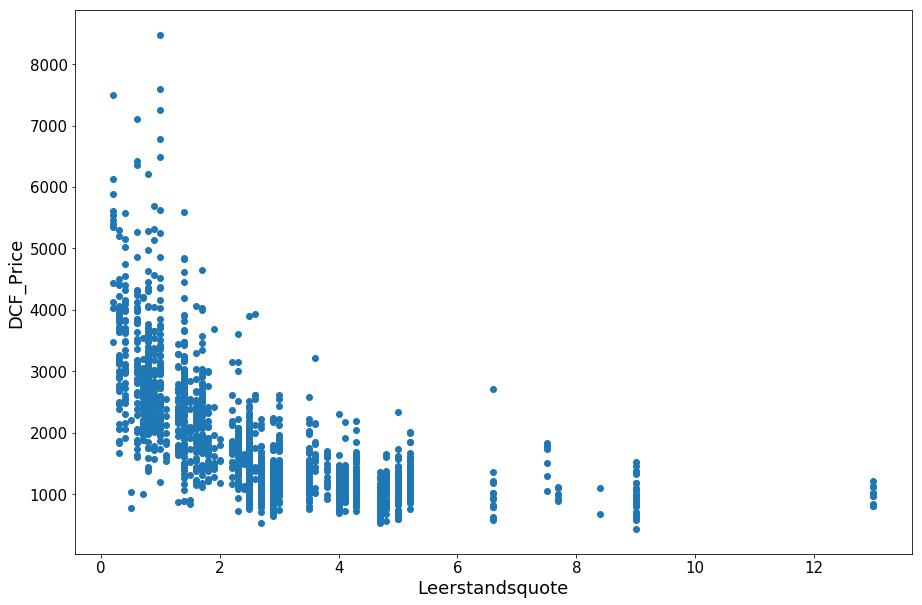

In [172]:
makePlot(data, 'Leerstandsquote', 'DCF_Price', 'Figure5.png')

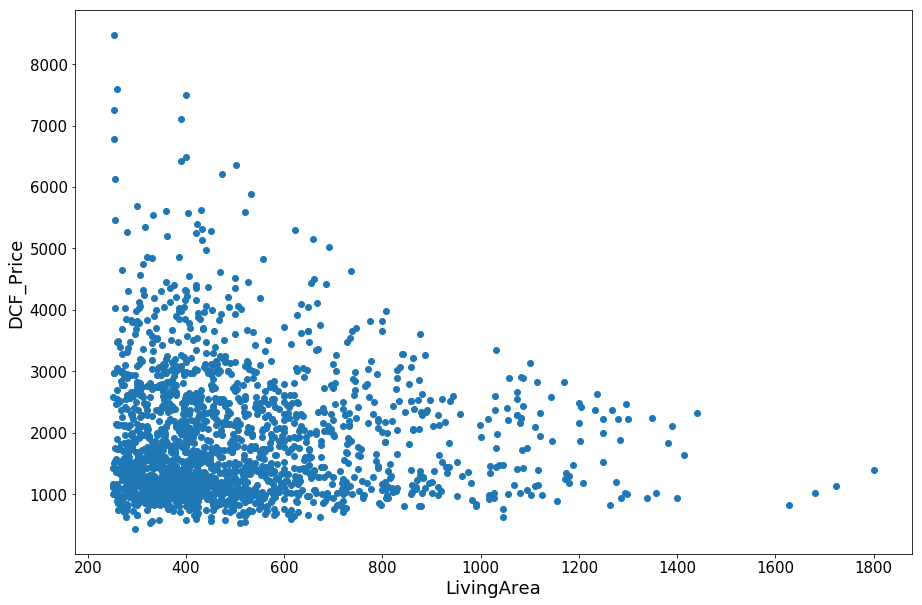

In [173]:
makePlot(data, 'LivingArea', 'DCF_Price', 'Figure6.png')

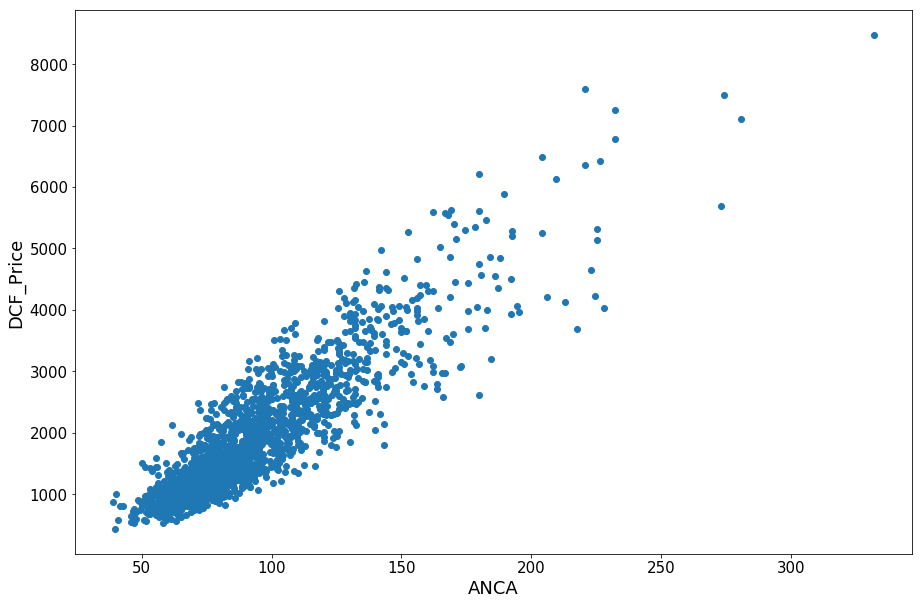

In [174]:
makePlot(data, 'ANCA', 'DCF_Price', 'Figure7.png')

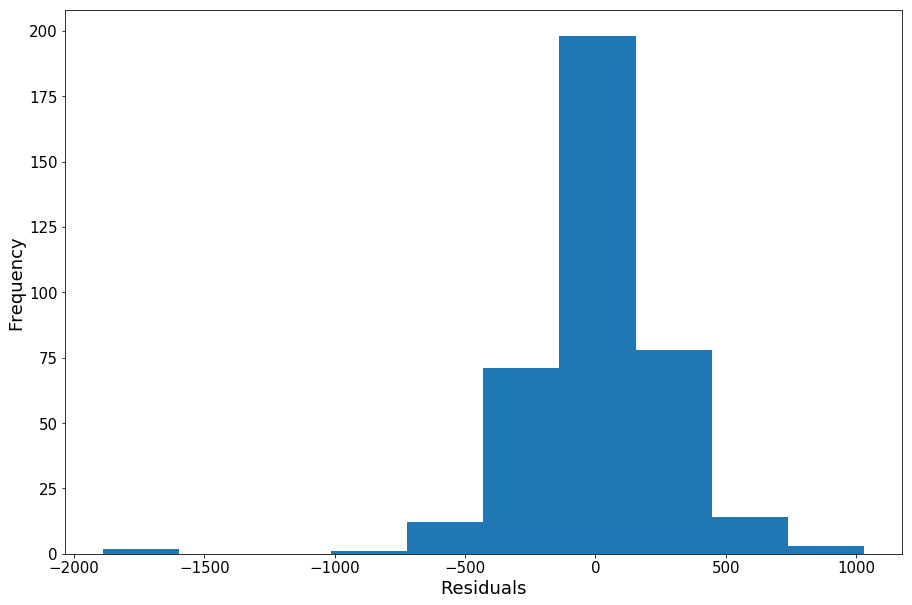

In [175]:
makeHist(residuals, 'Residuals', 'Frequency', 'ResidualsDistribution.png')

In [81]:
#look at biggest mistakes of the model
#This part was used to identify bad valuations with different types of anomalies
#To the most common types of anomalies include: not started valuations with default values only, 
#extremely inaccurate valuations (probably due to the lack of experience by evaluator), 
#objects with a very large investment need due extremally bad condition

#The function checkWrong helps to identify objects on which the model prediction was
#otside of the 30% range from the DCF price.
#Each case was then analysed manually based on the object description and 
#by manually checking of the excel file with the evaluation
address, mist = checkWrong(originalData, badPredTrain, 0)

['Hülsmannstraße 25, 45881 Gelsenkirchen']
[11.434737561207589]
[580.1476951012306]
['Mon Jul 11 16:06:38 2022']


In [82]:
#Lasso
badPredTrainLasso, badPredTestLasso, metricsTrainLas, metricsTestLas, coeffsLasso = tryDiffModels(data, False, False, True, False, False, False, False, False)

Train: 
n =  1515
MAE  184.55505124919944
MSE  73648.7781137752
MDAE 124.14361980706417
MDAPE 8.091761610527048
MAPE 9.939407008169626
5%:  0.3207920792079208
10%:  0.5986798679867987
20%:  0.8937293729372937
R_squared 0.9305834778273901
Adj_R_squared 0.9233989689727906
Test: 
n =  379
MAE  178.70271298254482
MSE  62311.81796776203
MDAE 132.4563552291852
MDAPE 8.69541478773807
MAPE 10.239937128994919
5%:  0.3034300791556728
10%:  0.5910290237467019
20%:  0.8839050131926122
R_squared 0.9383129774541737
Adj_R_squared 0.9011962096511766
best params {'alpha': 0.3}


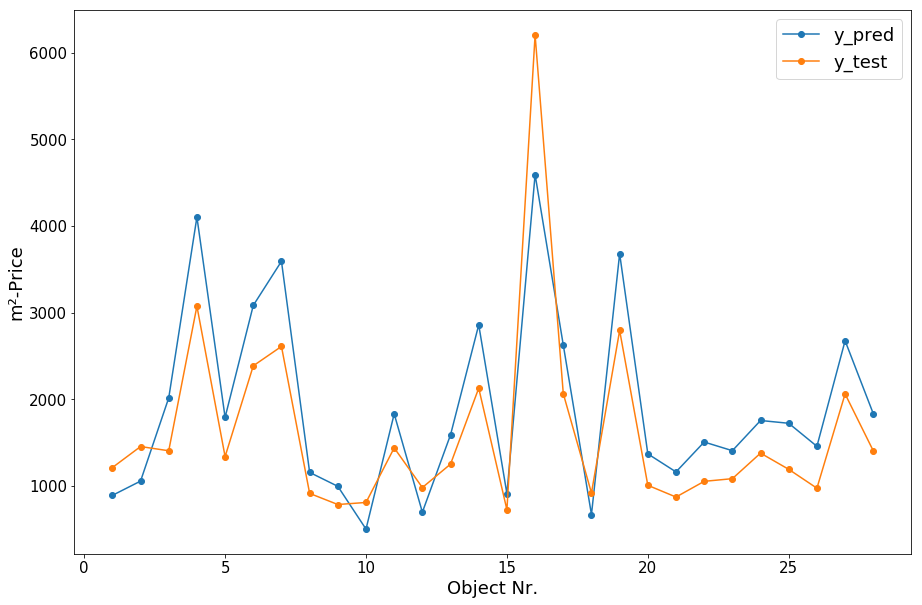

In [176]:
#Check the trend of bad predictions. Doe's the model underestimate or overestimate the prices. For Lasso
plotBadPred(badPredTest)

In [84]:
coffsLasso = compareCoffs(coeffsLasso)

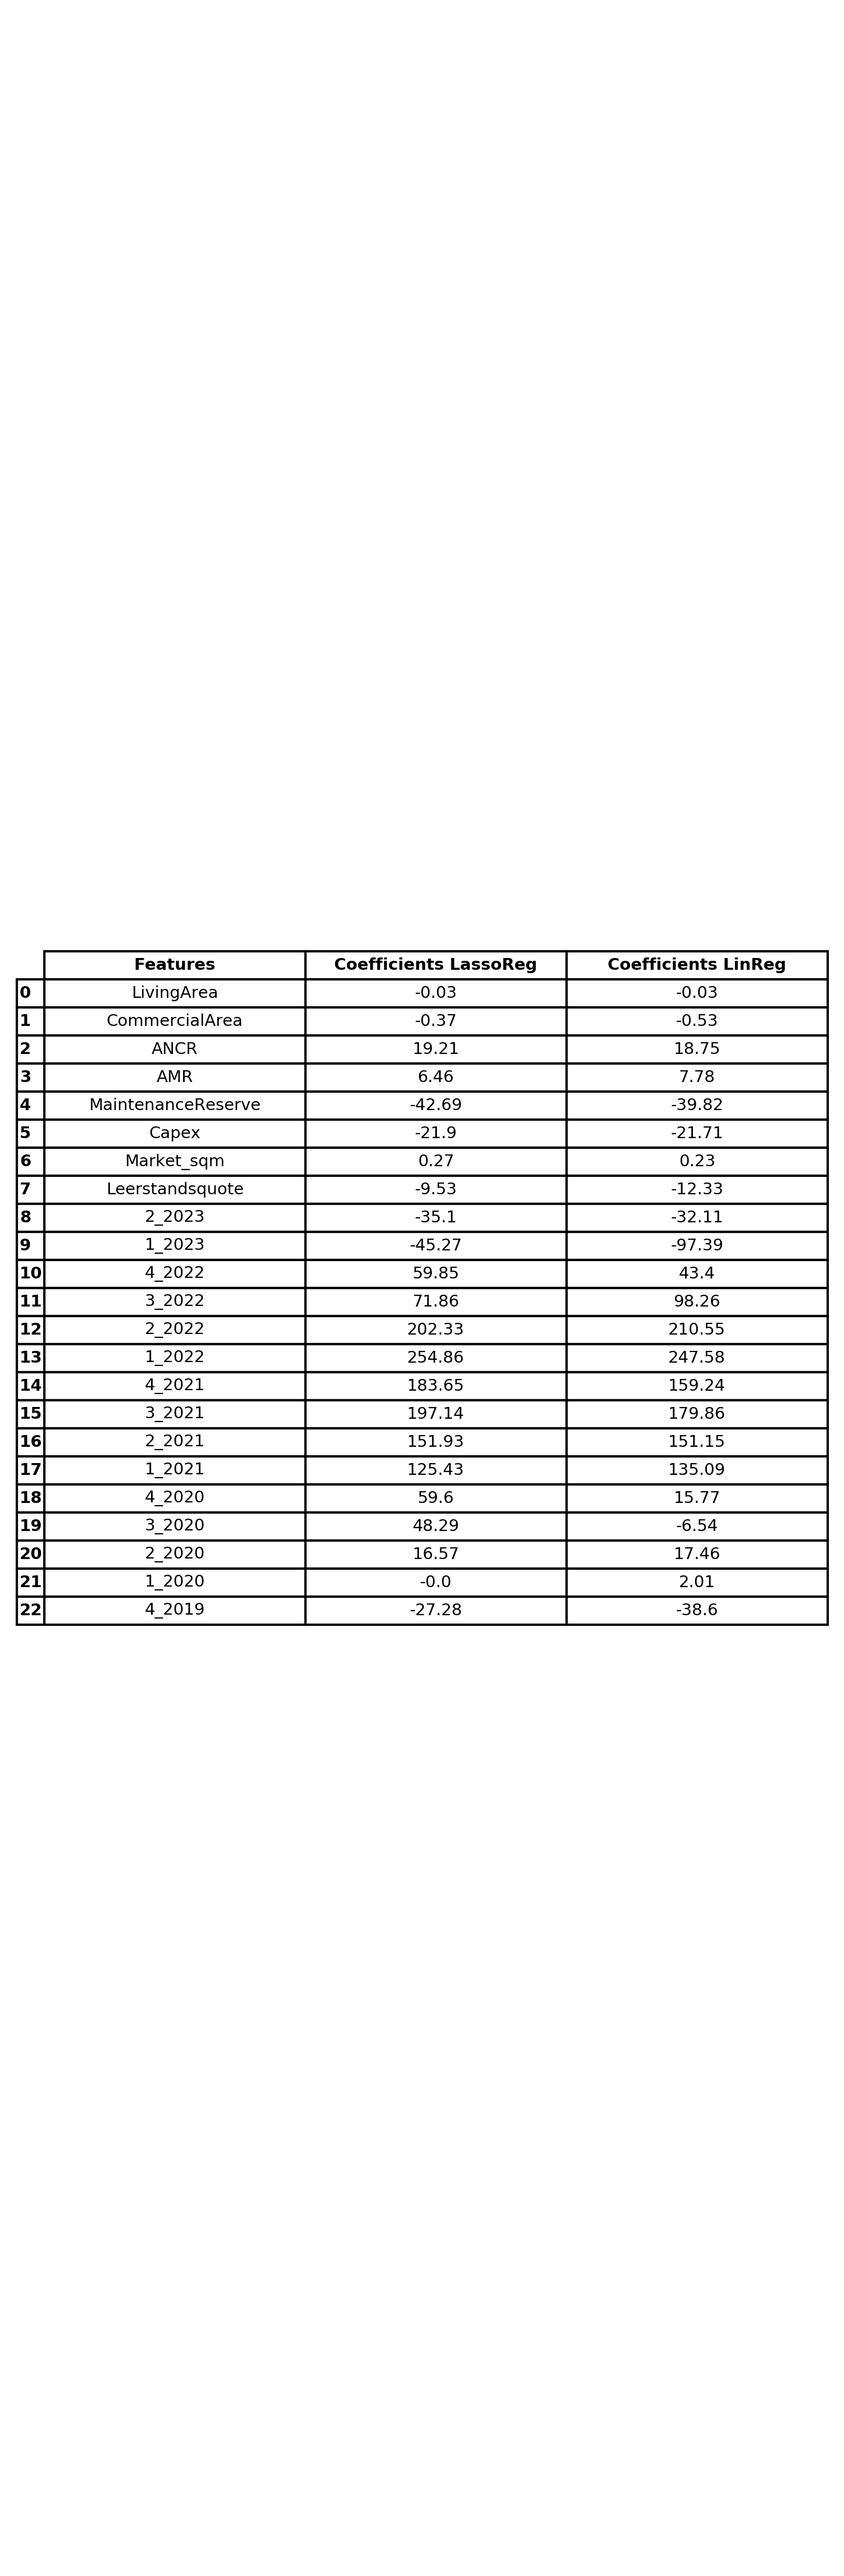

In [177]:
plotTable([6, 20], coffsLasso, 'Table7.png', 300)

In [86]:
#Ridge
metricsTrainRid, metricsTestRid, coeffsRidge = tryDiffModels(data, False, False, False, True, False, False, False, False)

Train: 
n =  1515
MAE  181.60805976653953
MSE  69955.9262255167
MDAE 126.98609435947401
MDAPE 7.889478905792685
MAPE 9.900633061686298
5%:  0.32673267326732675
10%:  0.6006600660066007
20%:  0.8891089108910891
R_squared 0.9311536852598532
Adj_R_squared 0.9240281920433074
Test: 
n =  379
MAE  184.67093962956463
MSE  74818.3168820223
MDAE 136.5994852187514
MDAPE 8.16886457517911
MAPE 10.126522260789873
5%:  0.3113456464379947
10%:  0.58311345646438
20%:  0.8812664907651715
R_squared 0.9371392853120756
Adj_R_squared 0.899316312915104
best params {'alpha': 0.7}


# Testing of decision tree

In [87]:
#Decision Tree
metricsTrainTree, metricsTestTree, feature_importanceTree, best_featuresTree = tryDiffModels(data, False, False, False, False, True, False, False, False)

Train: 
n =  1515
MAE  224.91525264168104
MSE  105368.9789572248
MDAE 159.92646887748015
MDAPE 10.122549670465643
MAPE 12.512472617612067
5%:  0.2726072607260726
10%:  0.49438943894389437
20%:  0.8085808580858086
R_squared 0.8966576461411013
Adj_R_squared 0.885961863161536
Test: 
n =  379
MAE  273.446756831201
MSE  177169.0695117178
MDAE 188.1673558731825
MDAPE 11.424046118594902
MAPE 14.90600473805577
5%:  0.22427440633245382
10%:  0.42216358839050133
20%:  0.7519788918205804
R_squared 0.8494280353424707
Adj_R_squared 0.7588296498281946
best params {'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 25}


# Testing of ensemble models

In [88]:
#Random forest
metricsTrainRandom, metricsTestRandom, feature_importanceRF, best_features = tryDiffModels(data, False, False, False, False, False, True, False, False)

Train: 
n =  1515
MAE  214.04752699174531
MSE  98261.46520892874
MDAE 156.79403992340121
MDAPE 9.442587373096883
MAPE 11.828887591886403
5%:  0.27524752475247527
10%:  0.5214521452145214
20%:  0.8363036303630363
R_squared 0.9050773049655904
Adj_R_squared 0.8952529444008045
Test: 
n =  379
MAE  220.132937821513
MSE  115387.44487630723
MDAE 159.8292907139728
MDAPE 10.034110231688416
MAPE 12.8198664269591
5%:  0.27440633245382584
10%:  0.49868073878627966
20%:  0.8153034300791556
R_squared 0.8961296119166869
Adj_R_squared 0.8336313275614732
best params {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 300}


In [89]:
#AdaBoost
metricsTrainAda, metricsTestAda = tryDiffModels(data, False, False, False, False, False, False, True, False)

Train: 
n =  1515
MAE  249.3678343775779
MSE  109017.22676017981
MDAE 196.16109629478206
MDAPE 11.642578030551435
MAPE 15.242532011872292
5%:  0.23102310231023102
10%:  0.4409240924092409
20%:  0.7551155115511551
R_squared 0.8994442413791127
Adj_R_squared 0.8890368669445894
Test: 
n =  379
MAE  264.32769660516004
MSE  127276.78384657462
MDAE 205.02373721388358
MDAPE 12.365423783615922
MAPE 16.068087272214203
5%:  0.22427440633245382
10%:  0.40897097625329815
20%:  0.7150395778364116
R_squared 0.8611359688236279
Adj_R_squared 0.7775821873530988
best params {'learning_rate': 0.01, 'n_estimators': 700}


In [90]:
#LightGBM
metricsTrainRandom, metricsTestRandom, feature_importanceGBM, best_featuresGBM = tryDiffModels(dataLight, False, False, False, False, False, False, False, True)

Train: 
n =  1515
MAE  190.49892574654882
MSE  87535.71885678652
MDAE 128.05684119353782
MDAPE 8.372579046479373
MAPE 10.26923161187485
5%:  0.32739273927392737
10%:  0.5828382838283829
20%:  0.8792079207920792
R_squared 0.9151896975200411
Adj_R_squared 0.9145689967034878
Test: 
n =  379
MAE  217.57712110966972
MSE  119588.06412741441
MDAE 144.18337836468822
MDAPE 8.75976489989462
MAPE 10.81019403605019
5%:  0.316622691292876
10%:  0.5488126649076517
20%:  0.862796833773087
R_squared 0.8934835118155977
Adj_R_squared 0.8902909195266919
best params {'bagging_fraction': 0.3, 'bagging_freq': 2, 'boosting': 'gbdt', 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 5, 'objective': 'root_mean_squared_error', 'task': 'predict'}


In [91]:
#Check feature importances for Top-10 features for Decision Tree, Random Forest and LightGBM model
feaImp = featureImportances(feature_importanceTree, feature_importanceRF, feature_importanceGBM)

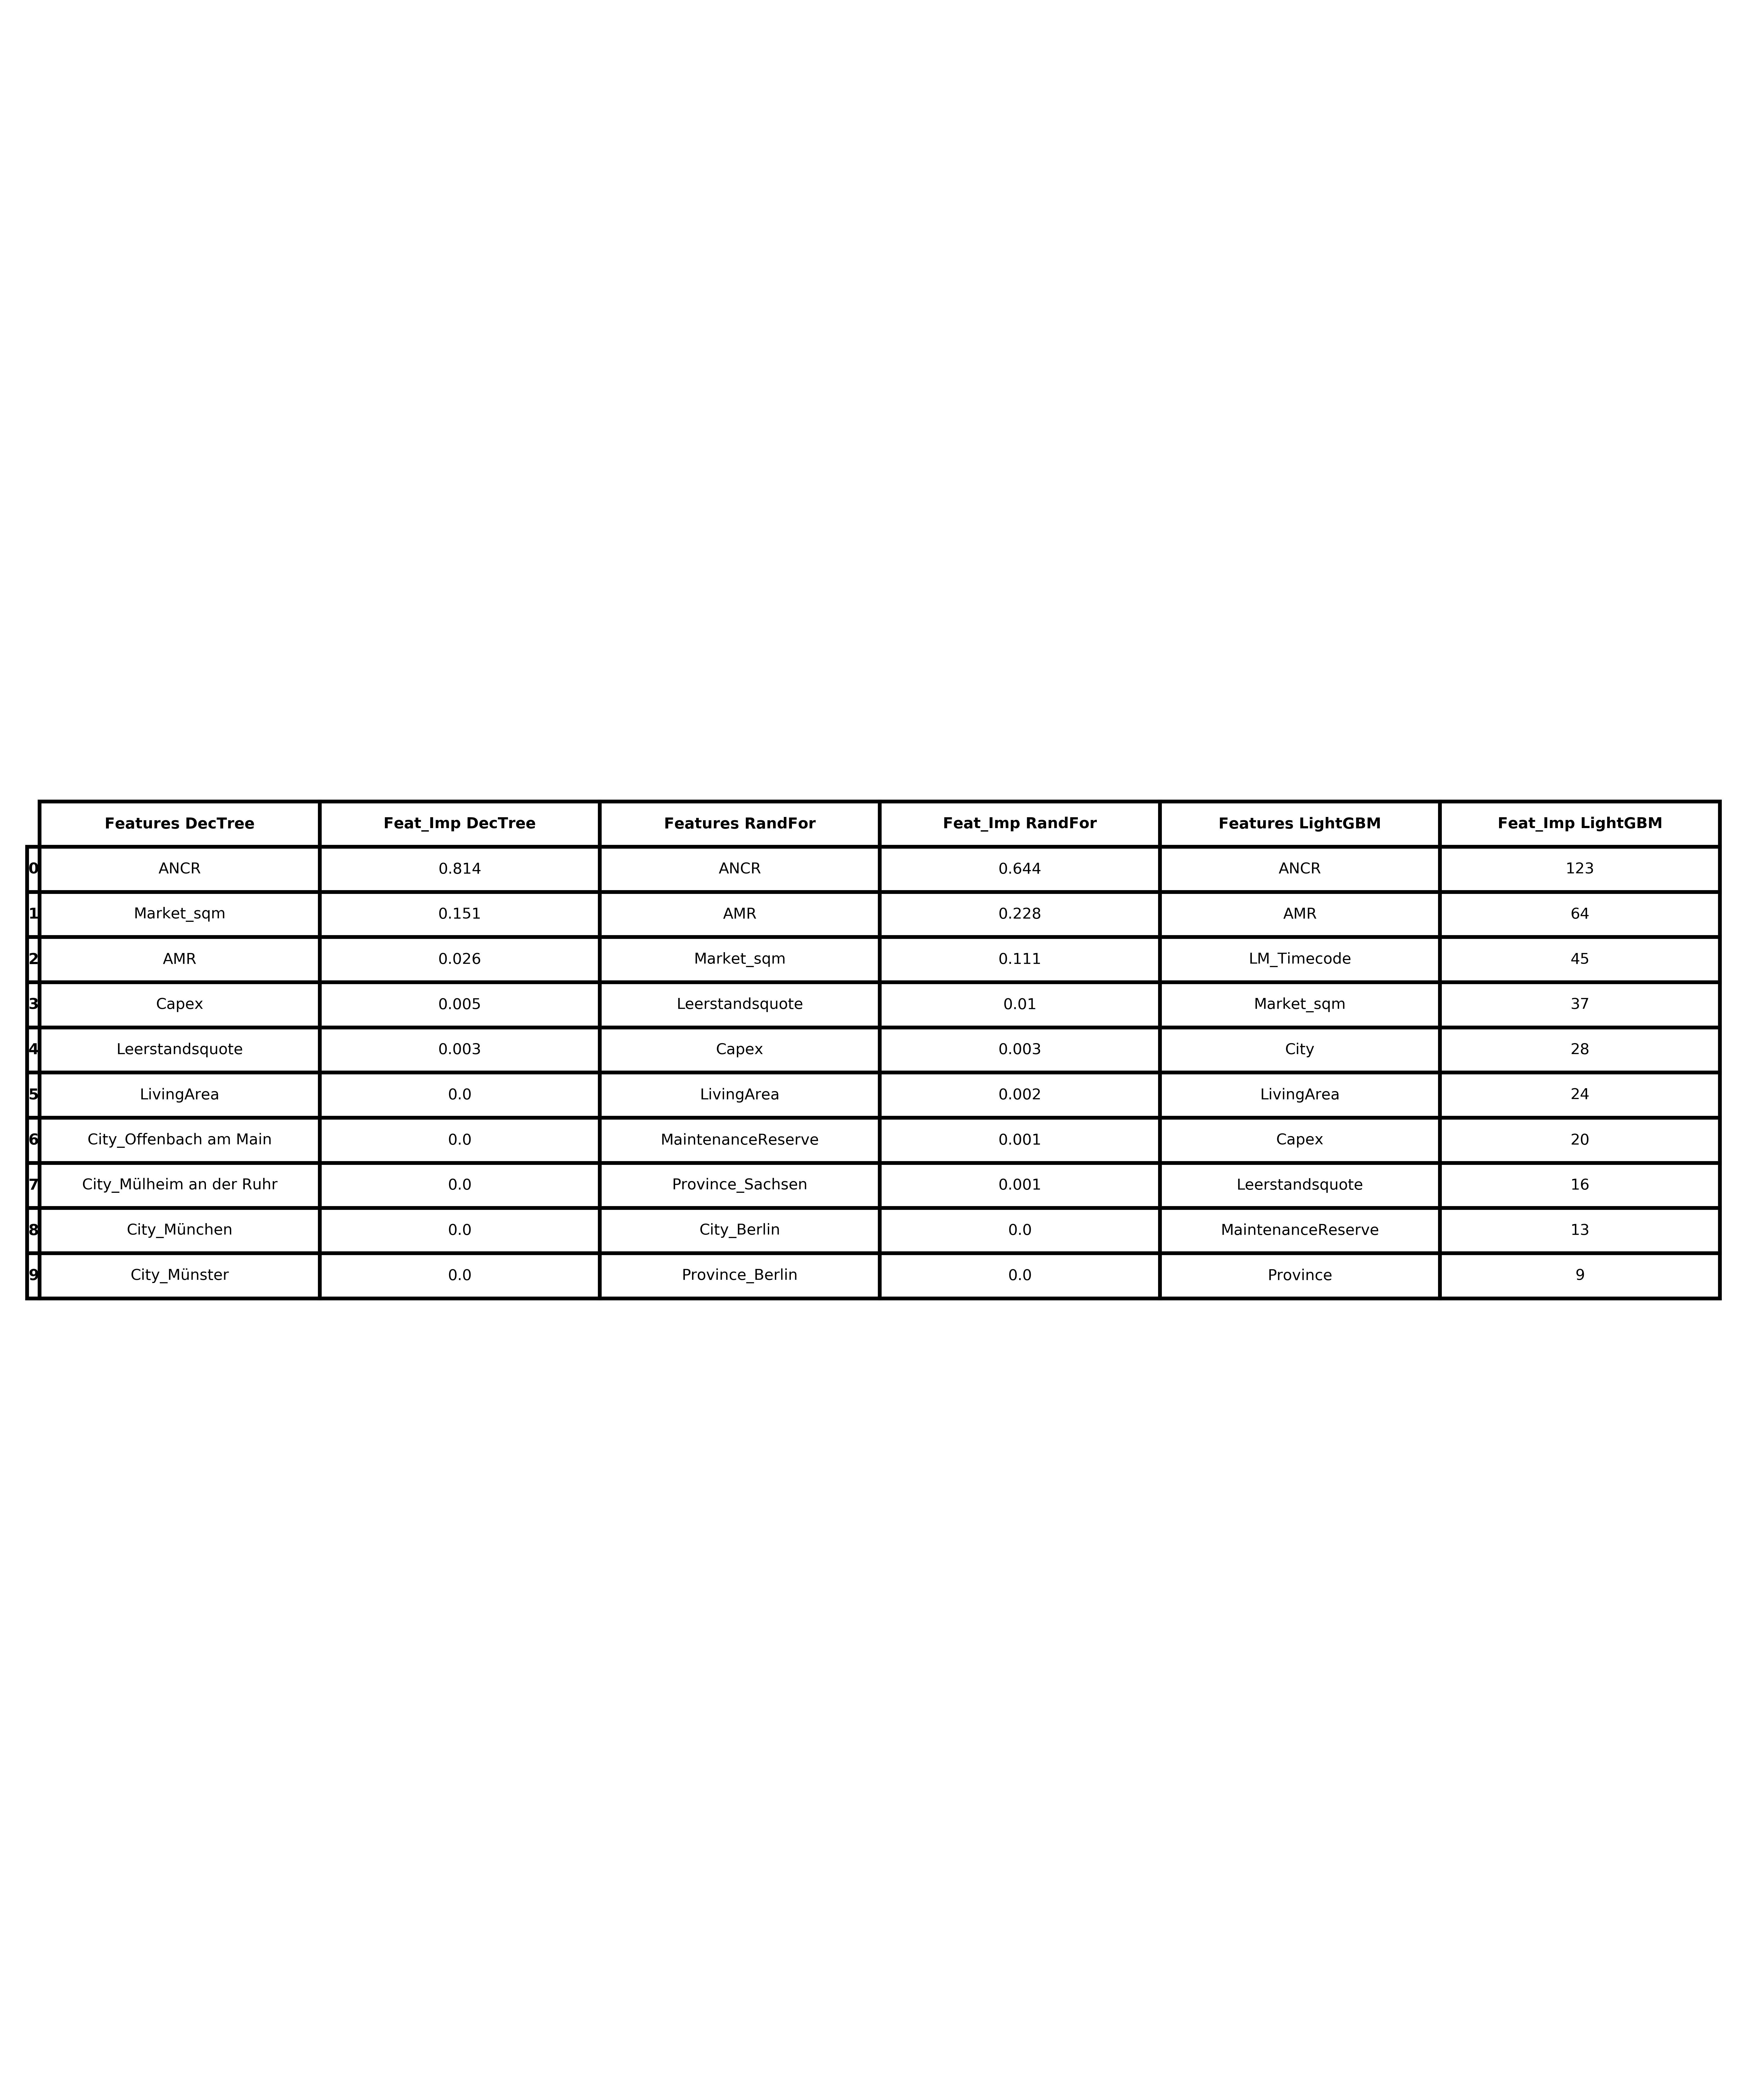

In [178]:
plotTable([8, 10], feaImp, 'Table5.png', 1000)

# Compare performance for different data

In [108]:
#Don't filter out bad evaluations, use all cities, use Price    
originalData, data1 = prepData(dataORIG, [], False, 1, False, False, sqm_german, leer, False)
#Data for lightGBM. Don't filter out bad evaluations, use all cities, use Price    
originalData, dataL1 = prepData(dataORIG, [], False, 1, False, False, sqm_german, leer, True)


#Don't filter out bad evaluations, use all cities, use sqm-Price 
originalData, data2 = prepData(dataORIG, [], False, 1, True, False, sqm_german, leer, False)
#Data for lightGBM. Don't filter out bad evaluations, use all cities, use sqm-Price 
originalData, dataL2 = prepData(dataORIG, [], False, 1, True, False, sqm_german, leer, True)


#Filter out bad evaluations, use all cities, use sqm-Price 
originalData, data3 = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, False)
#Data for lightGBM. Filter out bad evaluations, use all cities, use sqm-Price
originalData, dataL3 = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, True)


#Filter out bad evaluations, use only that cities, where we have more than 3 objects, use sqm-Price 
originalData, data4 = prepData(dataORIG, badValuations, True, 3, True, False, sqm_german, leer, False) 
#Data for lightGBM. Filter out bad evaluations, use only that cities, where we have more than 3 objects, use sqm-Price 
originalData, dataL4 = prepData(dataORIG, badValuations, True, 3, True, False, sqm_german, leer, True)


#Filter out bad evaluations, use all cities, use sqm-Price AND drop ANCA
originalData, data5 = prepData(dataORIG, badValuations, False, 1, True, True, sqm_german, leer, False)
#Data for lightGBM. Filter out bad evaluations, use all cities, use sqm-Price AND drop ANCA
originalData, dataL5 = prepData(dataORIG, badValuations, False, 1, True, True, sqm_german, leer, True)

In [109]:
#Note, the models here will be trained with best hyperparameters found by GridSearchCV 
#in the initial "testing" experiments

#Run all models 5 times (to evaluate the quality of models independent of the specific split of the data). 
#Run it for all different types of dataset preprocessing deffined above
runs = 5
perf1 = performance(runs, data1, dataL1)
perf2 = performance(runs, data2, dataL2)
perf3 = performance(runs, data3, dataL3)
perf4 = performance(runs, data4, dataL4)
perf5 = performance(runs, data5, dataL5)

MEAN: 929765.1747904326
Train: 
n =  1587
MAE  489436.10599027906
MSE  414574044710.5014
MDAE 421471.1698575743
MDAPE 52.333315835849916
MAPE 72.77954240494947
5%:  0.04914933837429111
10%:  0.09829867674858223
20%:  0.19344675488342786
R_squared 0.0
Adj_R_squared -0.09833795013850422
Test: 
n =  397
MAE  460961.12316752365
MSE  366016497672.88367
MDAE 419549.0697796547
MDAPE 46.175047574858844
MAPE 68.50357482977245
5%:  0.060453400503778336
10%:  0.12090680100755667
20%:  0.23929471032745592
R_squared -0.00030014469446770775
Adj_R_squared -0.5595230602323198
MEAN: 930157.3550273863
Train: 
n =  1587
MAE  481709.472199554
MSE  398293894008.4702
MDAE 424406.3979370085
MDAPE 50.59601031930843
MAPE 72.41222013878806
5%:  0.054820415879017016
10%:  0.10270951480781348
20%:  0.2060491493383743
R_squared 0.0
Adj_R_squared -0.09833795013850422
Test: 
n =  397
MAE  492352.0041416475
MSE  431088641290.3198
MDAE 415417.3437086285
MDAPE 52.351167503134455
MAPE 70.17773844344933
5%:  0.0403022670

In [110]:
#For the report. Use only the most meaningful metrics for the final report
#All other metrics will be shown for the 3rd experiment only
perf1 = perf1.round(2)
perf2 = perf2.round(2)
perf3 = perf3.round(2)
perf4 = perf4.round(2)
perf5 = perf5.round(2)

perf1n = perf1[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]
perf2n = perf2[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]
perf3n = perf3[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]
perf4n = perf4[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]
perf5n = perf5[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]

In [111]:
perf1n, perf2n, perf3n, perf4n, perf5n = finalTablesUpdate(perf1n, perf2n, perf3n, perf4n, perf5n)

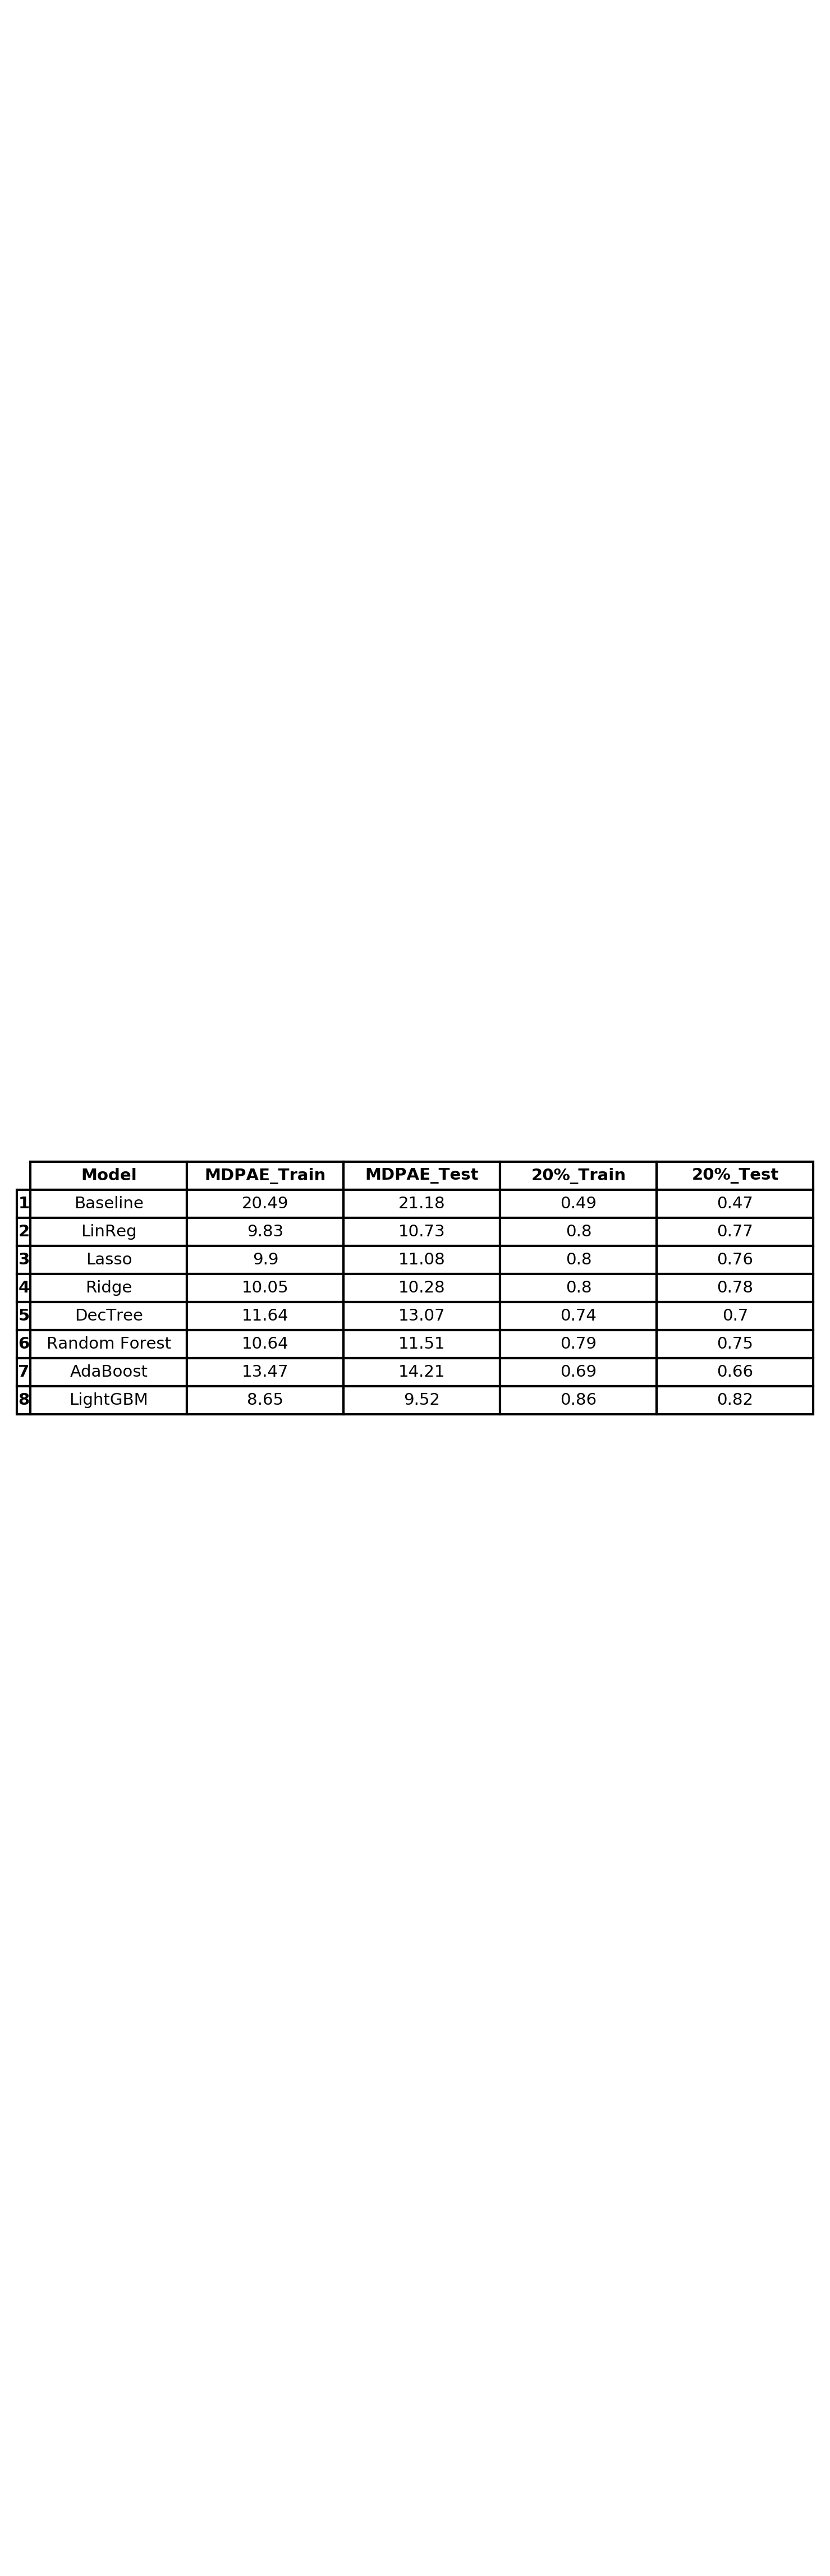

In [179]:
plotTable([6, 20], perf1n, 'Table1.png', 300)

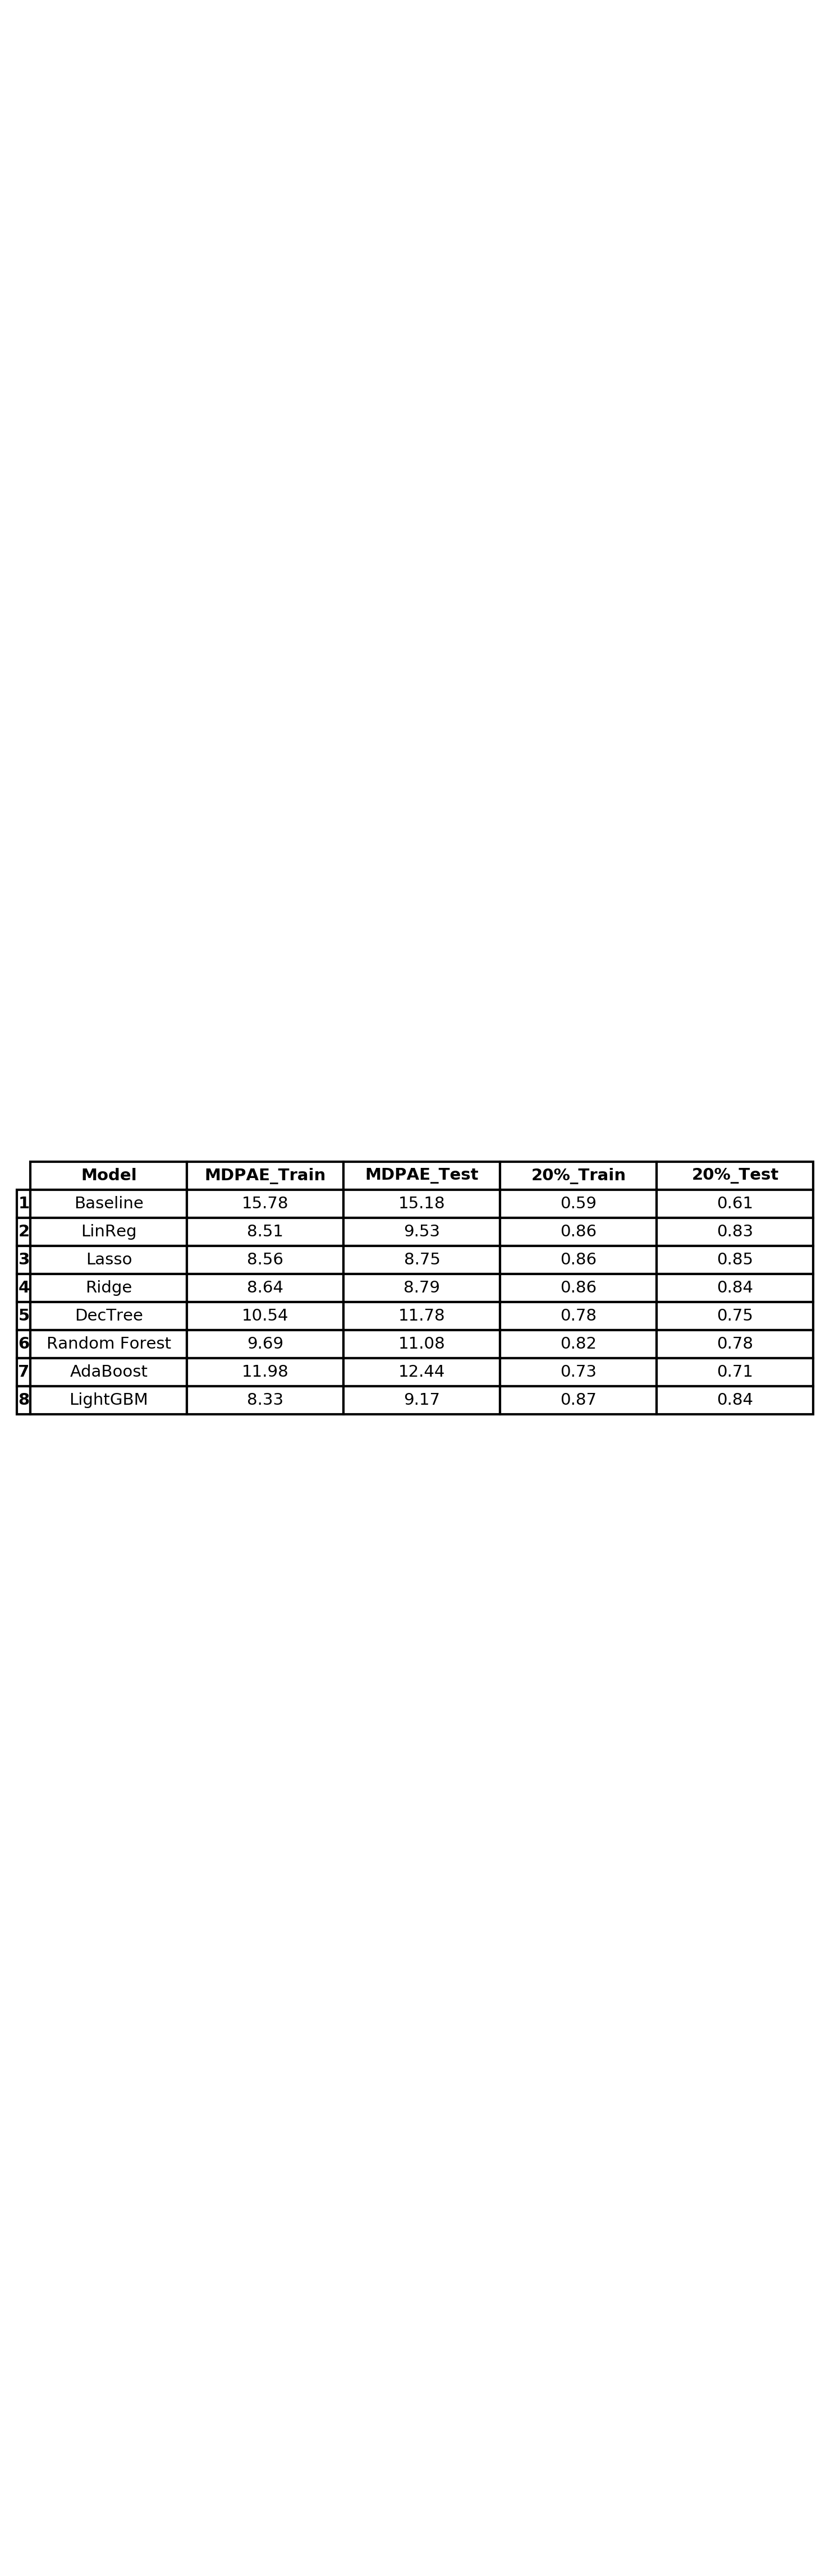

In [180]:
plotTable([6, 20], perf2n, 'Table2.png', 300)

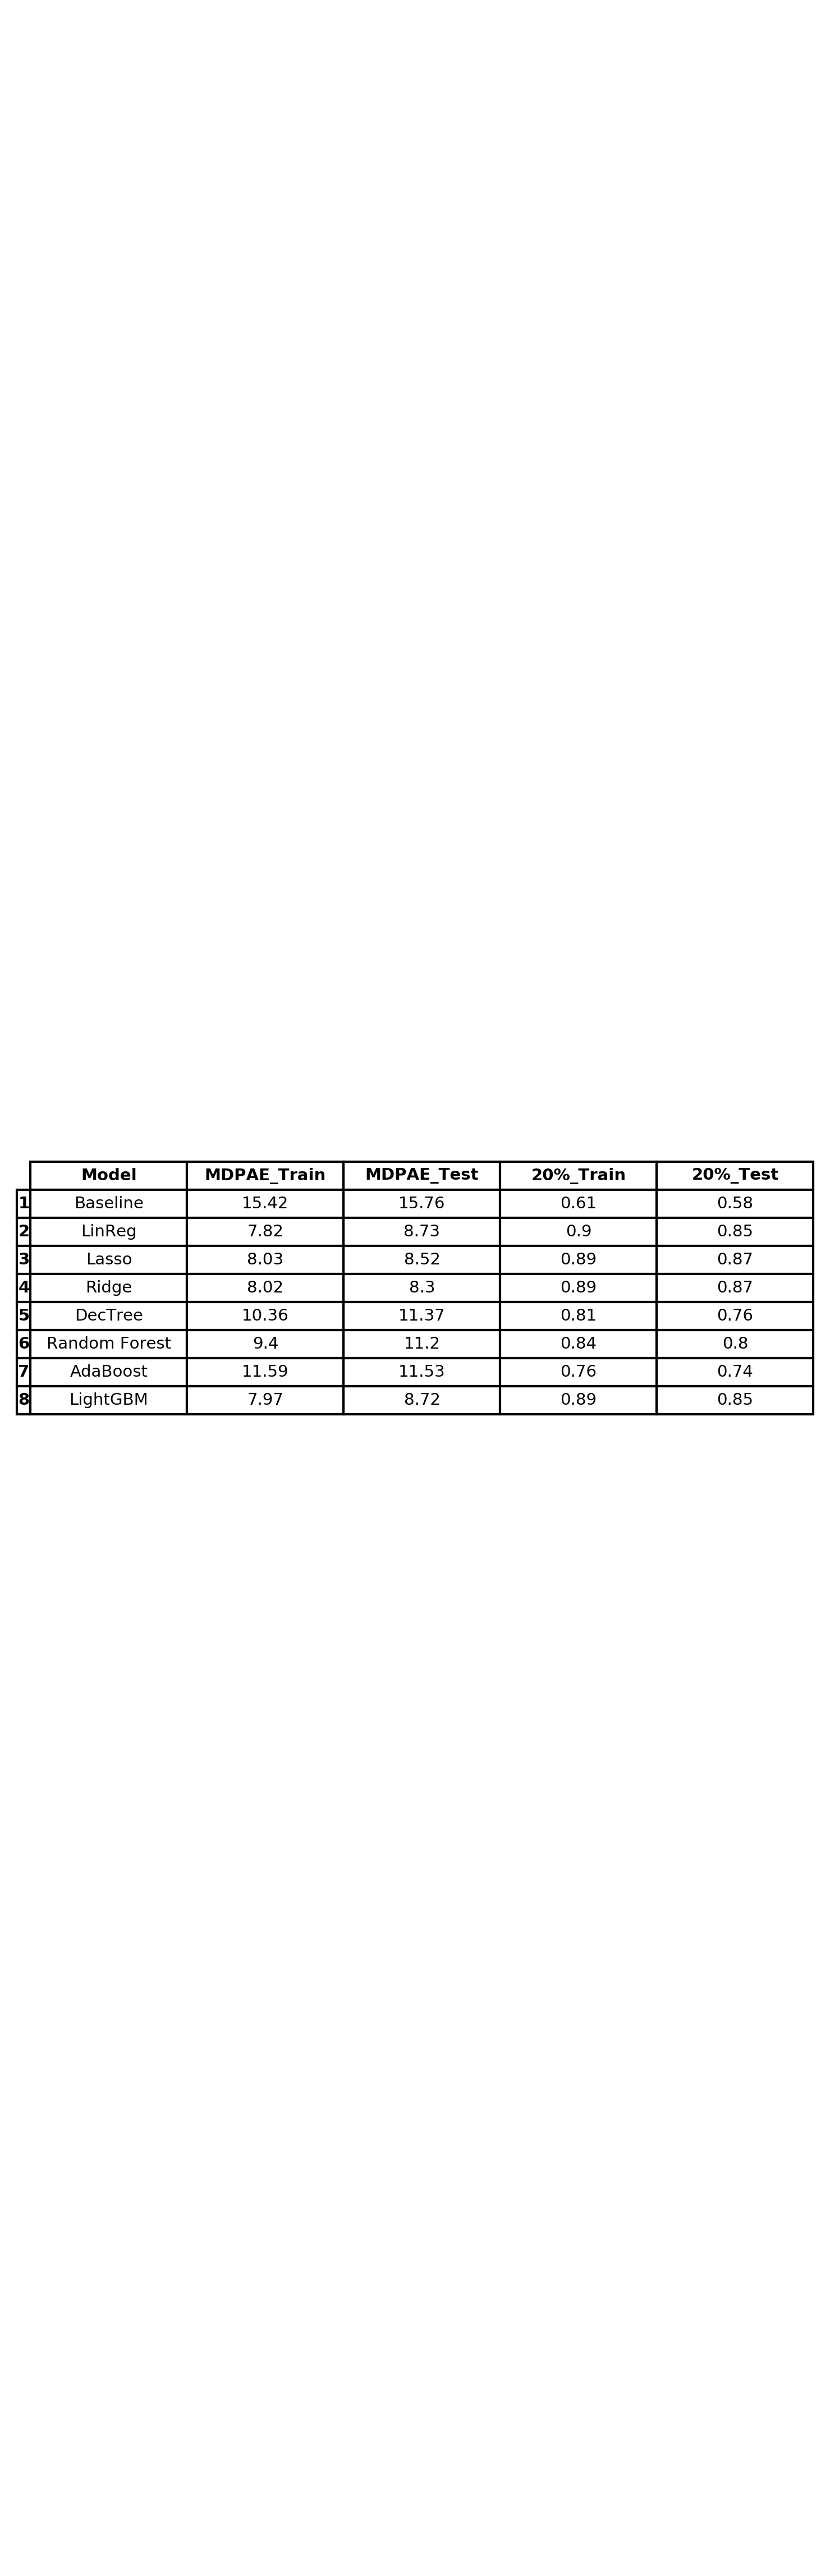

In [181]:
plotTable([6, 20], perf3n, 'Table3.png', 300)

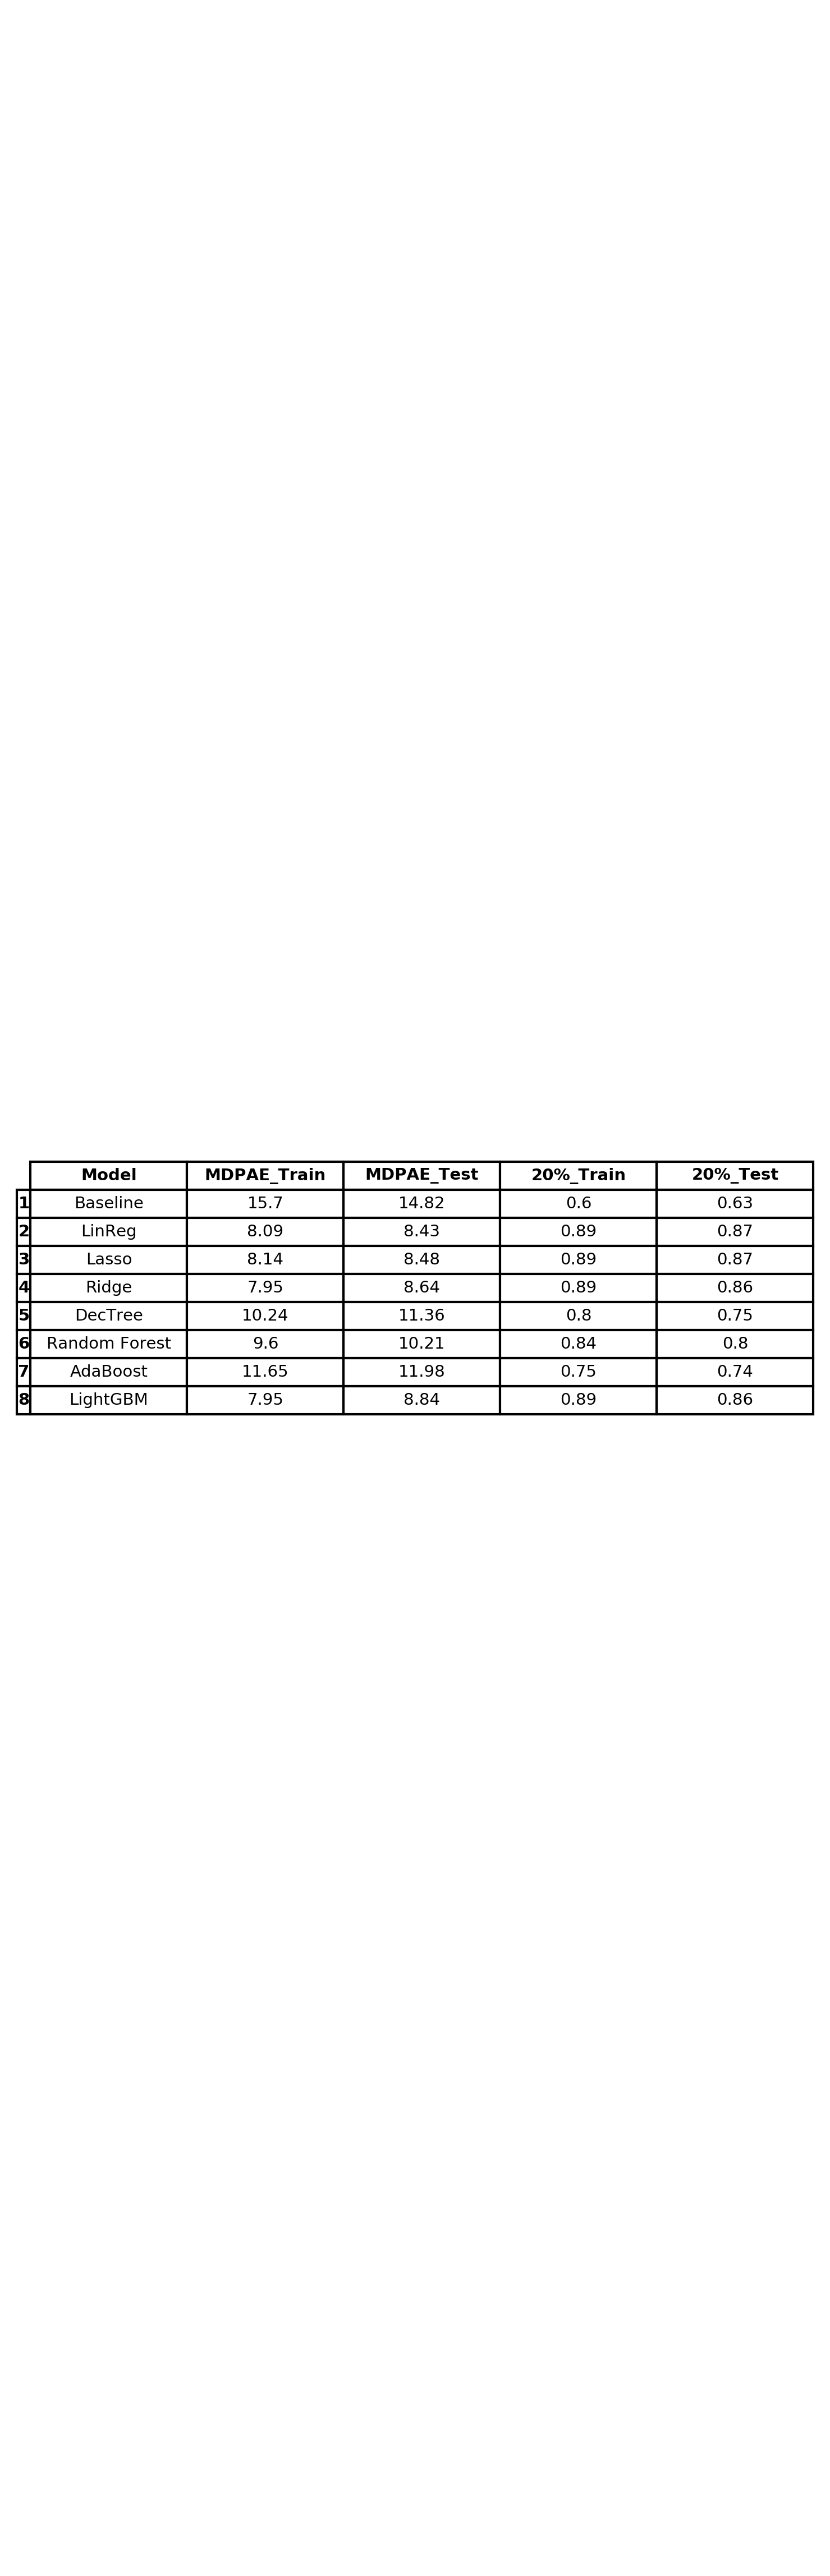

In [182]:
plotTable([6, 20], perf4n, 'Table4.png', 300)

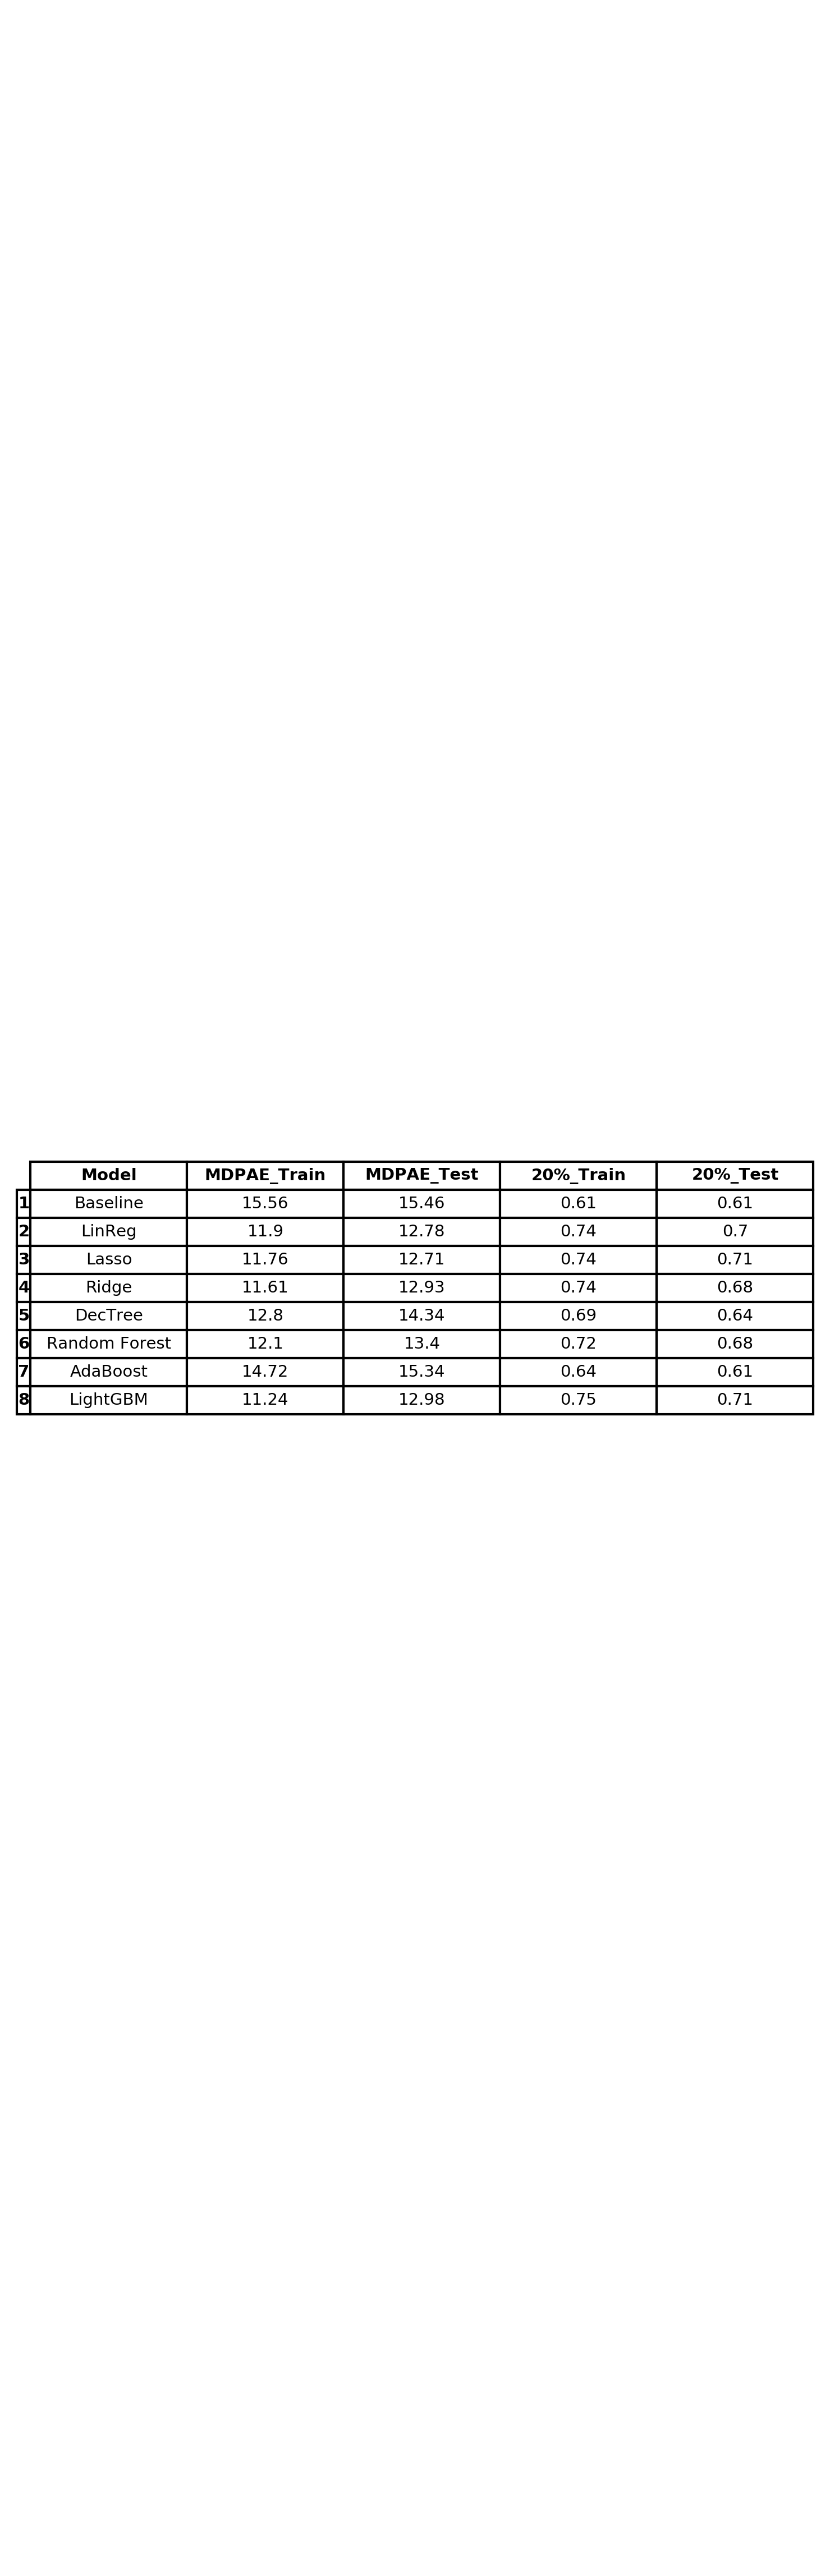

In [183]:
plotTable([6, 20], perf5n, 'Table6.png', 300)

# Compare performance with and without one-hot encodding  
# Compare performance with and without vacancy rate and market sqm 

In [135]:
#Performance without one-hot encodding of information about the date (in timecode) of valuation
#NOTE!!! To do this experiment, the part of the code with one-hot encodding in the data preprocessing part
#has been commented out
originalData_No_One_Hot, data3_No_One_Hot = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, False)
#Data for lightGBM. Filter out bad evaluations, use all cities, use sqm-Price
originalData_No_One_Hot, dataL3_No_One_Hot = prepData(dataORIG, badValuations, False, 1, True, False, sqm_german, leer, True)

perf3_No_One_Hot  = performance(runs, data3_No_One_Hot, dataL3_No_One_Hot)
perf3_No_One_Hot  = perf3_No_One_Hot.round(2)
perf3n_No_One_Hot = perf3_No_One_Hot[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]
perf3n_No_One_Hot.loc[perf3n_No_One_Hot['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
perf3n_No_One_Hot = perf3n_No_One_Hot.loc[perf3n_No_One_Hot['Model'] != 'Mean']

MEAN: 1889.1873724312666
Train: 
n =  1515
MAE  789.4492950120024
MSE  1070975.662482286
MDAE 690.5142689829906
MDAPE 39.53228203830671
MAPE 49.77212604554593
5%:  0.053465346534653464
10%:  0.11089108910891089
20%:  0.22772277227722773
R_squared 0.0
Adj_R_squared -0.08686288585786084
Test: 
n =  379
MAE  795.2689752982242
MSE  971576.2712237163
MDAE 738.048048912013
MDAPE 42.03493841919892
MAPE 52.32667771077059
5%:  0.036939313984168866
10%:  0.10290237467018469
20%:  0.22955145118733508
R_squared -0.0009997284313447707
Adj_R_squared -0.4722875383153631
MEAN: 1878.712693594696
Train: 
n =  1515
MAE  796.0593815615264
MSE  1060452.1196244585
MDAE 704.4249355666861
MDAPE 40.376351490862696
MAPE 50.77306348586214
5%:  0.04686468646864687
10%:  0.11023102310231023
20%:  0.22178217821782178
R_squared 0.0
Adj_R_squared -0.08686288585786084
Test: 
n =  379
MAE  757.7360666529421
MSE  1013538.4018751408
MDAE 669.6352026531781
MDAPE 37.32649161364294
MAPE 46.34423973383935
5%:  0.050131926121

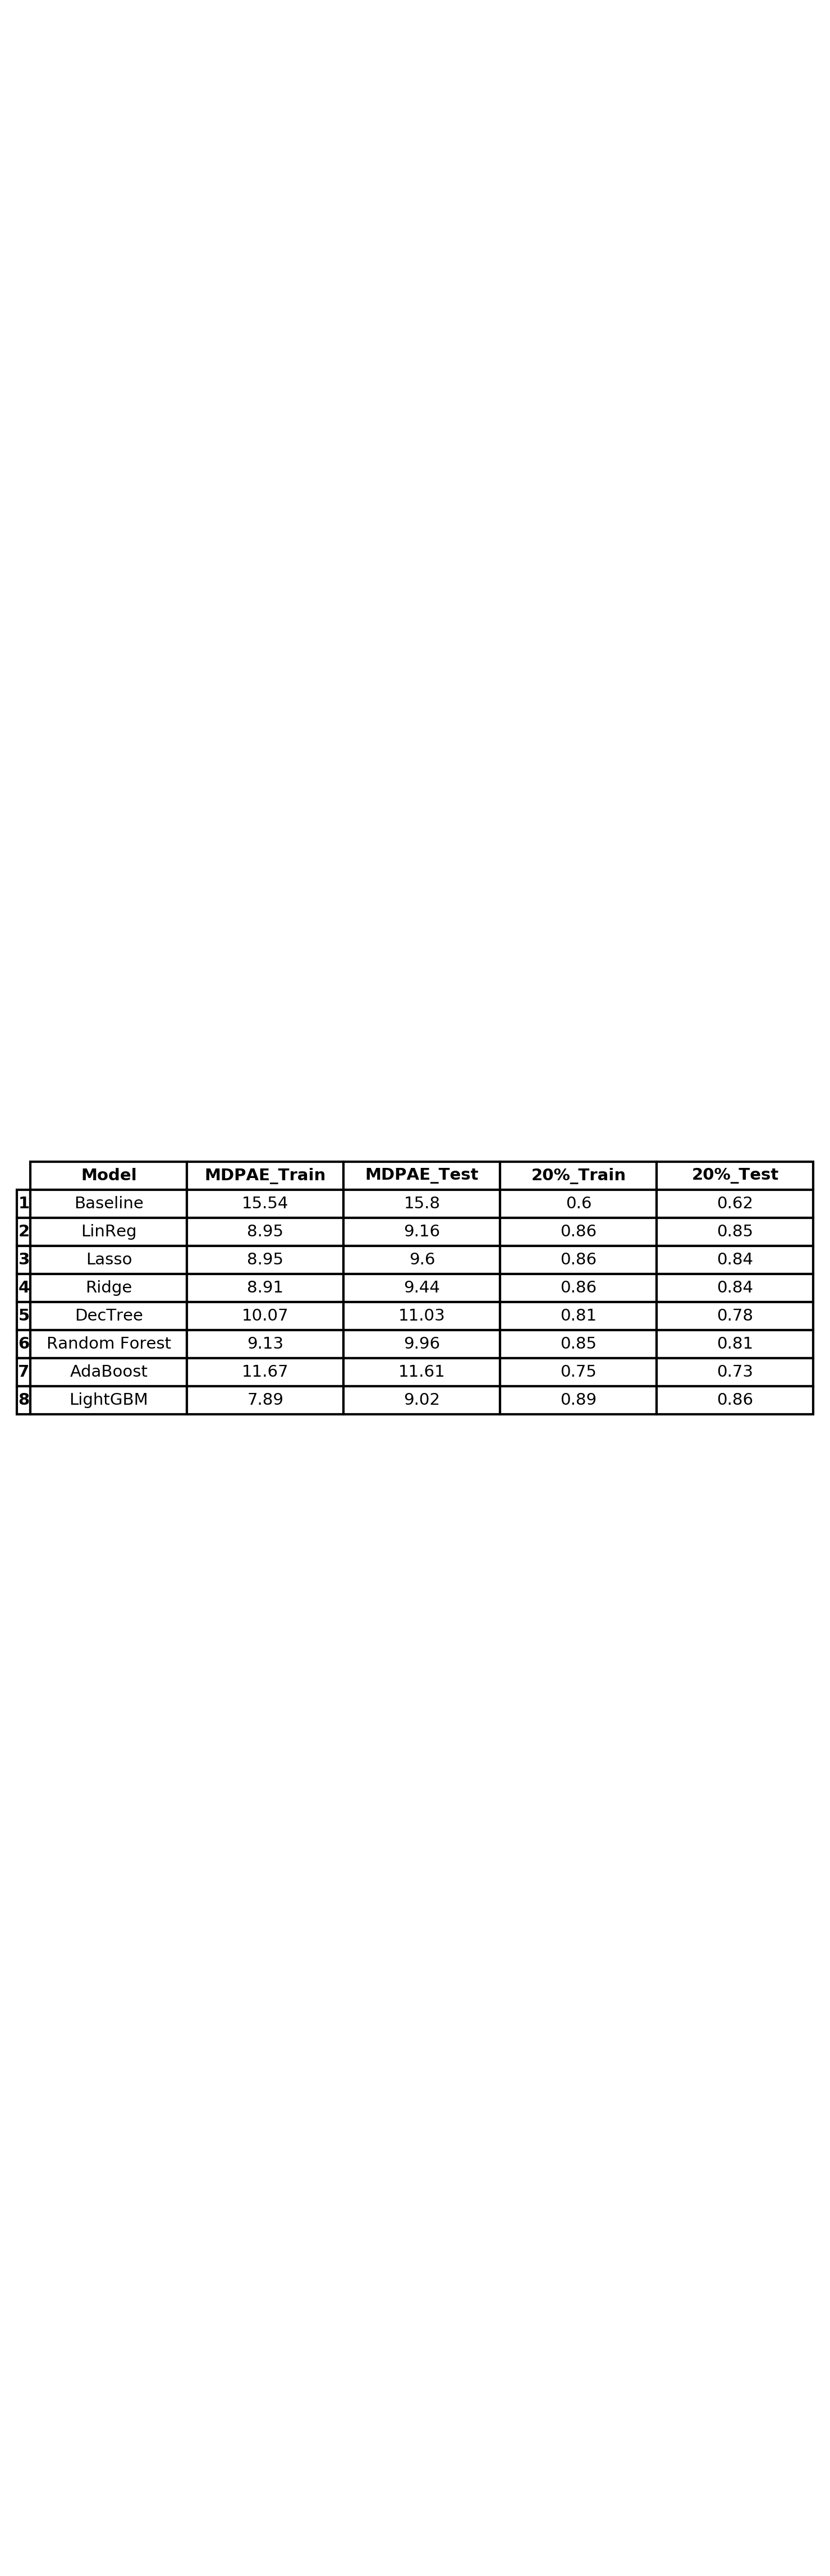

In [184]:
plotTable([6, 20], perf3n_No_One_Hot, 'Table10.png', 300)

In [141]:
#Show the perforance comparision without Leerstandsquote and market sqms
data3_Drop_Leer  = data3.drop(['Market_sqm', 'Leerstandsquote'], axis=1)
dataL3_Drop_Leer = dataL3.drop(['Market_sqm', 'Leerstandsquote'], axis=1)

perf3_Drop_Leer  = performance(runs, data3_Drop_Leer, dataL3_Drop_Leer)
perf3_Drop_Leer  = perf3_Drop_Leer.round(2)
perf3n_Drop_Leer = perf3_Drop_Leer[['Model', 'MDPAE_Train', 'MDPAE_Test', '20%_Train', '20%_Test']]

perf3n_Drop_Leer.loc[perf3n_Drop_Leer['Model'] == 'LinRegBase', 'Model'] = 'Baseline'
perf3n_Drop_Leer = perf3n_Drop_Leer.loc[perf3n_Drop_Leer['Model'] != 'Mean']

MEAN: 1876.3603652709915
Train: 
n =  1515
MAE  791.5848301227767
MSE  1080668.702162204
MDAE 700.7723078580882
MDAPE 40.06887286387881
MAPE 50.227441948074414
5%:  0.053465346534653464
10%:  0.11815181518151815
20%:  0.2316831683168317
R_squared 0.0
Adj_R_squared -0.10189228529839878
Test: 
n =  379
MAE  773.1522111301753
MSE  932852.7835314864
MDAE 682.3250684298016
MDAPE 38.09285165870628
MAPE 48.08164901535871
5%:  0.029023746701846966
10%:  0.08443271767810026
20%:  0.22427440633245382
R_squared -0.001165269859355167
Adj_R_squared -0.5900860168354465
MEAN: 1874.1078702256766
Train: 
n =  1515
MAE  792.561172786378
MSE  1067519.3095273431
MDAE 705.6570934428
MDAPE 40.41503904440996
MAPE 50.333318397334956
5%:  0.04884488448844884
10%:  0.11287128712871287
20%:  0.22772277227722773
R_squared 0.0
Adj_R_squared -0.10189228529839878
Test: 
n =  379
MAE  766.8839996172693
MSE  985589.4577421767
MDAE 665.8533590816753
MDAPE 37.148000766274095
MAPE 47.233613392557835
5%:  0.04221635883905

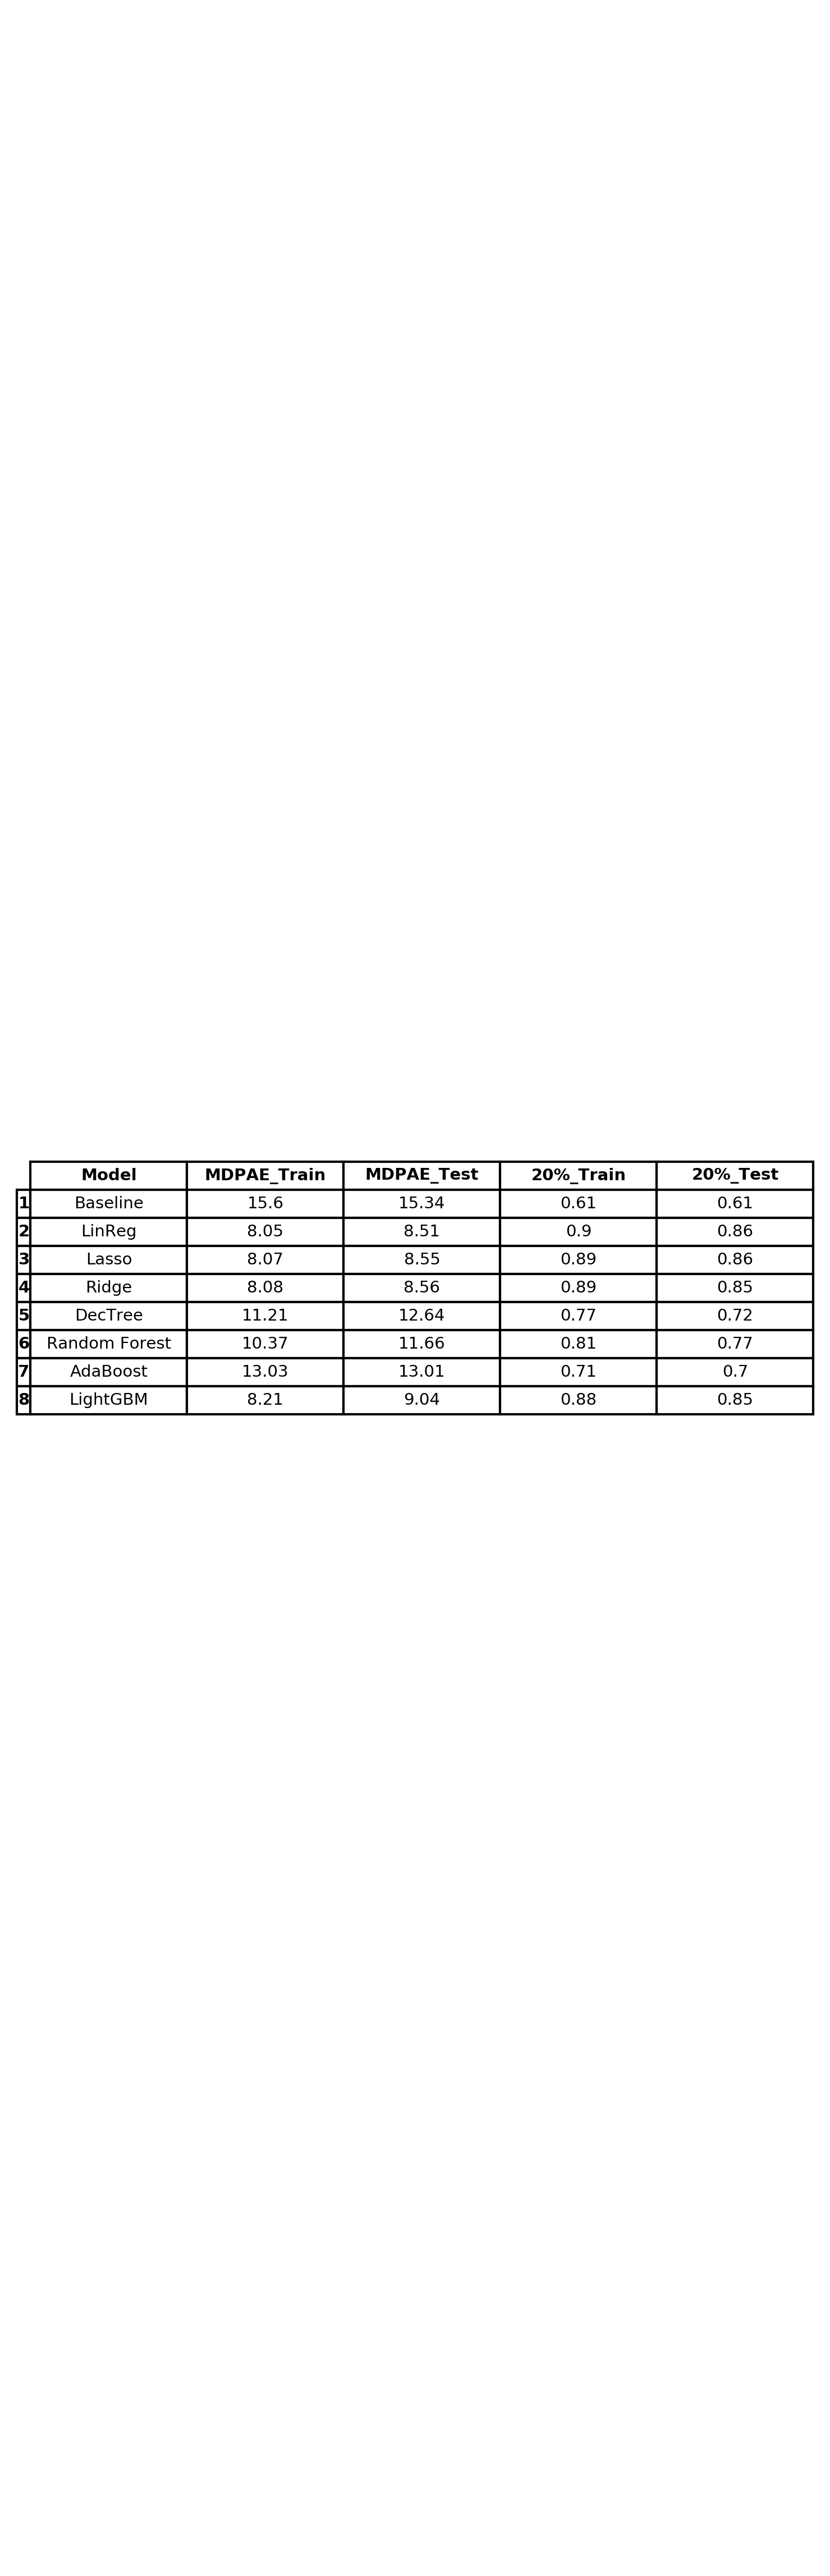

In [185]:
plotTable([6, 20], perf3n_Drop_Leer, 'Table11.png', 300)

# Plot all metrics for the best model

In [186]:
perf3_1  = perf3[['Model', 'MAE_Train', 'MAE_Test', 'MSE_Train', 'MSE_Test', 'MDAE_Train', 'MDAE_Test']].round(2)
perf3_2  = perf3[['Model', 'MDPAE_Train', 'MDPAE_Test', 'MAPE_Train', 'MAPE_Test', '5%_Train', '5%_Test']].round(2)
perf3_3  = perf3[['Model', '10%_Train', '10%_Test', '20%_Train', '20%_Test', 'R2_Train', 'R2_Test']].round(2)

In [187]:
perf3_1, perf3_2, perf3_3 = tableAllMetrics(perf3_1, perf3_2, perf3_3)

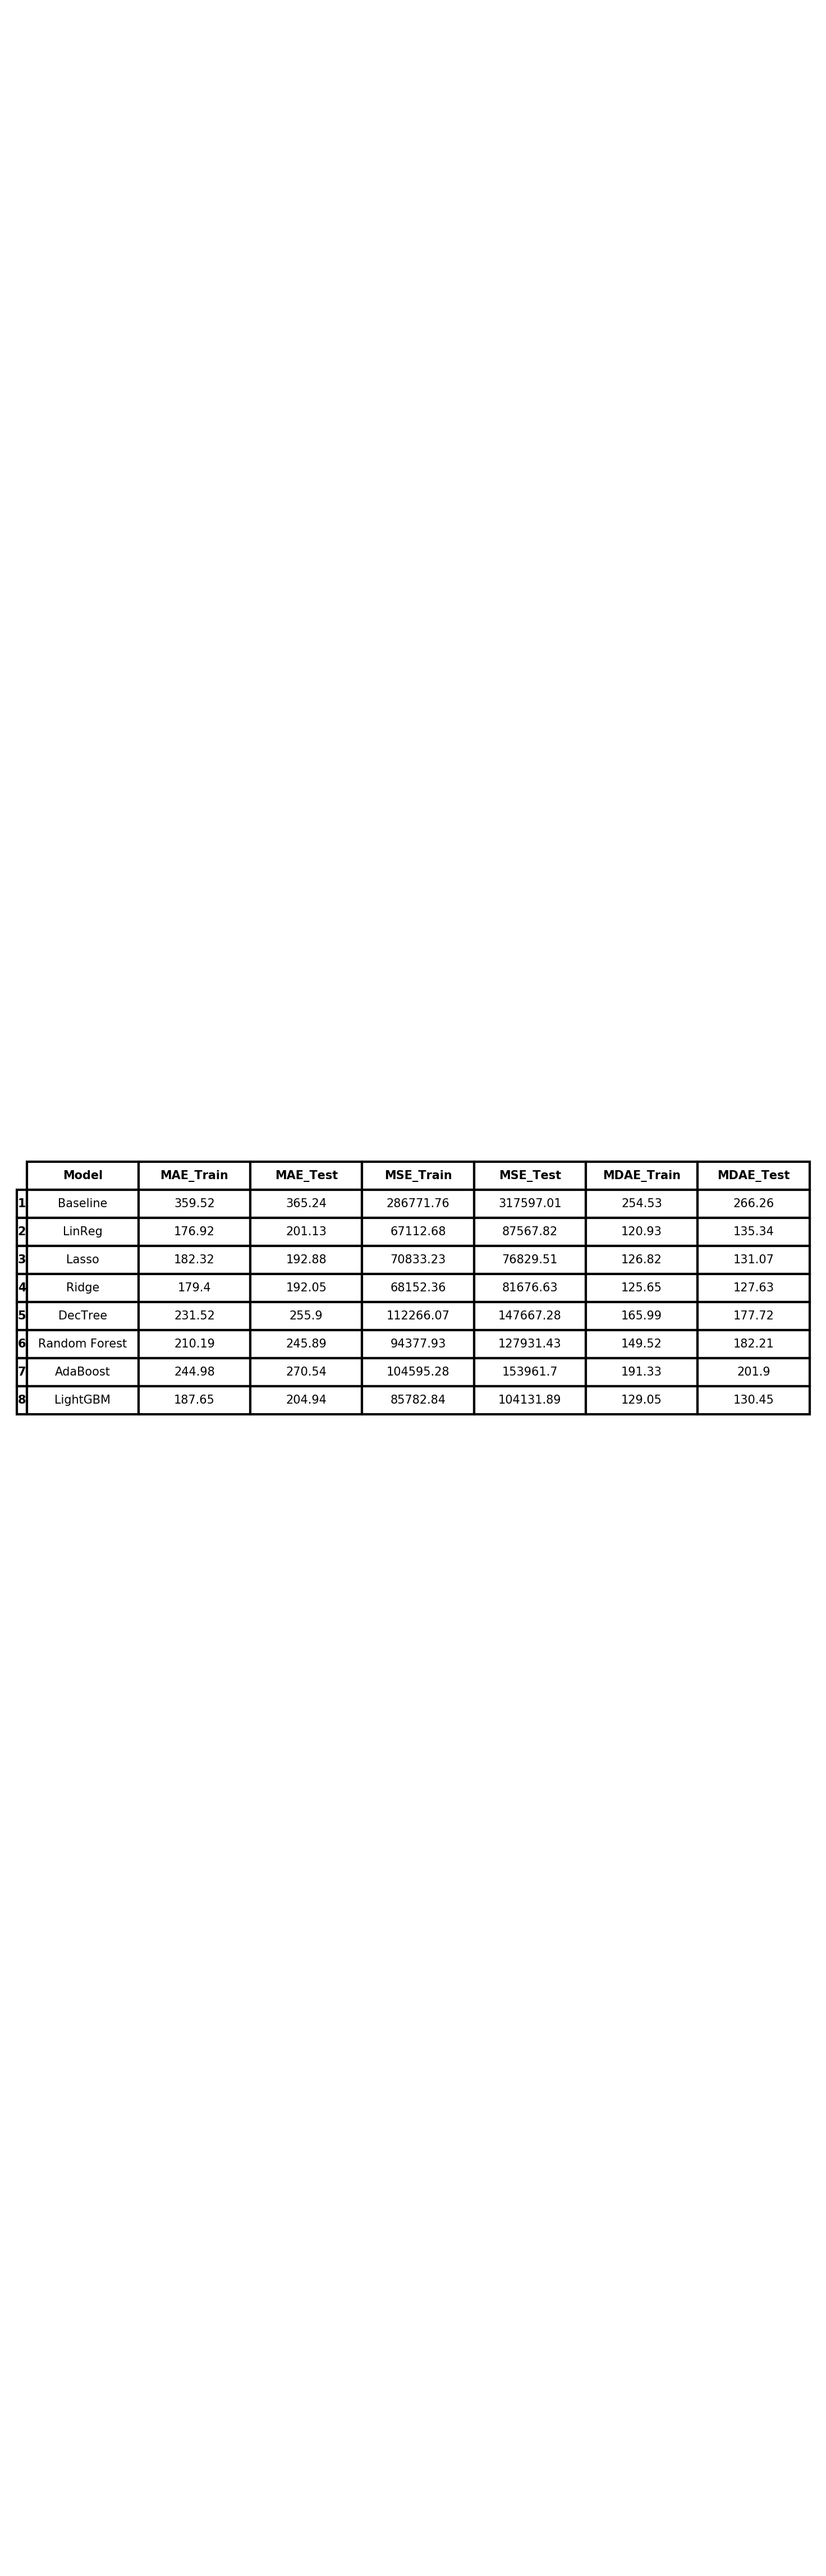

In [188]:
plotTable([6, 20], perf3_1, 'Table12_1.png', 300)

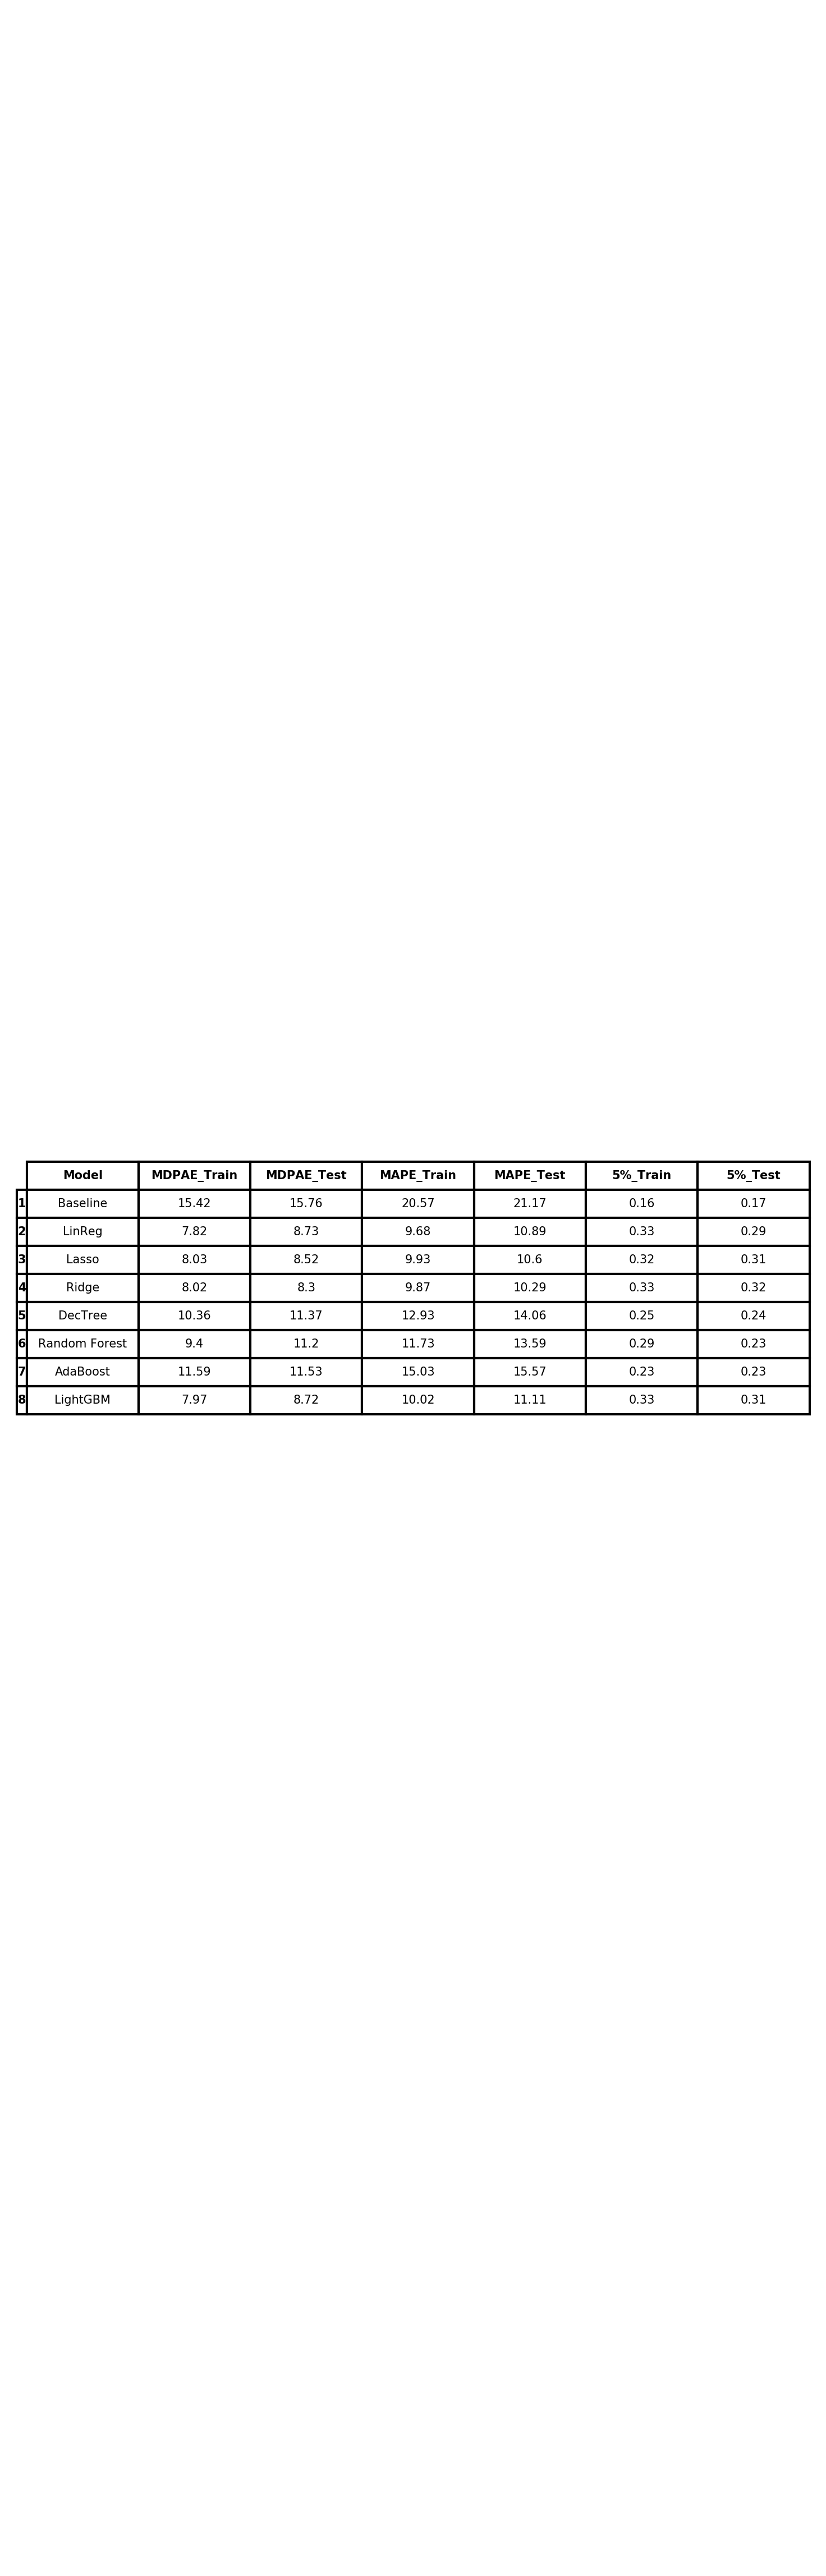

In [189]:
plotTable([6, 20], perf3_2, 'Table12_2.png', 300)

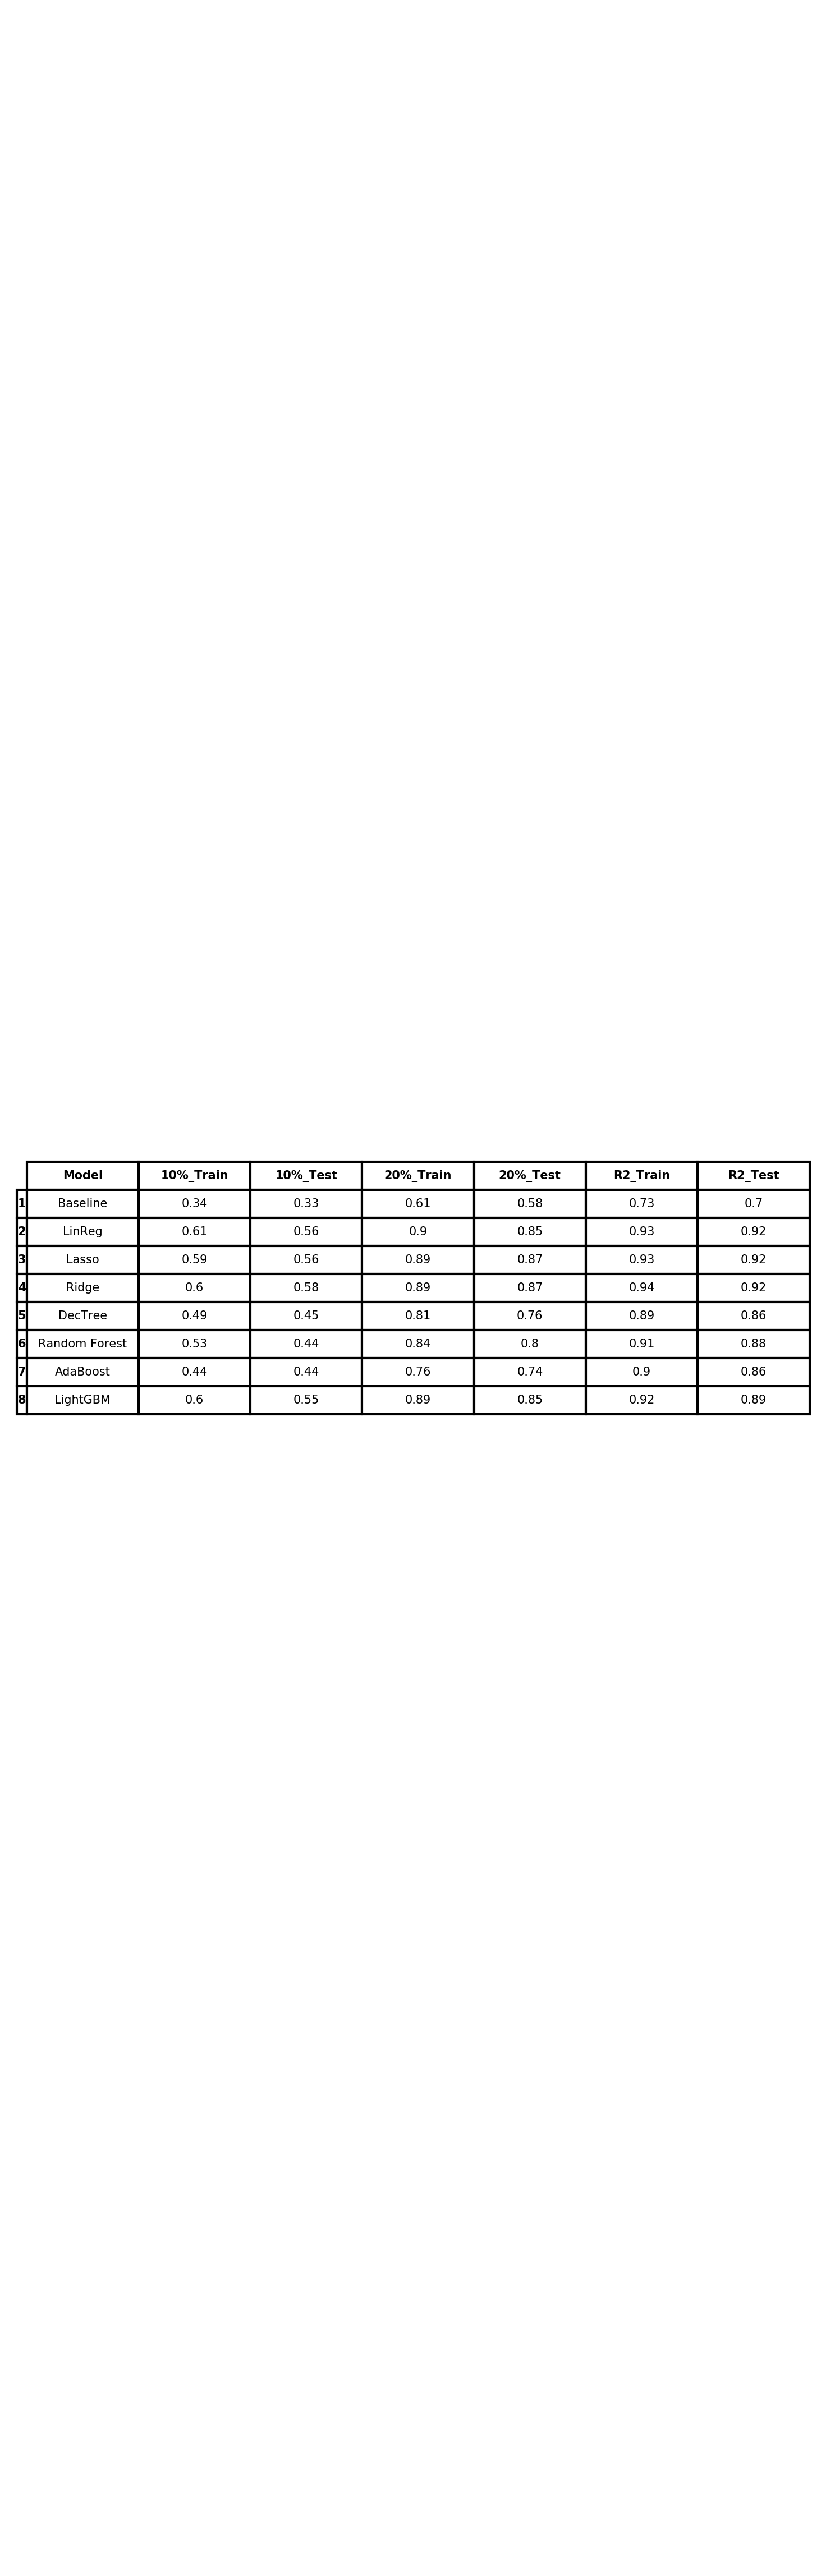

In [190]:
plotTable([6, 20], perf3_3, 'Table12_3.png', 300)

# Final test with the data from July and August

In [158]:
#Preprocessing of new dataset (last valuations from July and August, that were not used during the training/testing preocess)
#load original data again, sicne after the first loading it was changed several times
dataORIG_New    = pd.read_csv('datatop100_New.csv')
dataNewVal      = pd.read_excel('new_valuations.xlsx') 
data, data2     = preprocNewData(dataNewVal, dataORIG_New)

In [159]:
predictionsLasso = evaluateNewTestData(Lasso, data2, data)
short_pred_Lasso = predictionsLasso[['LivingArea', 'CommercialArea', 'ANCA', 'City', 'y_true', 'y_pred']].loc[:10, :]
short_pred_Lasso = short_pred_Lasso[['City', 'LivingArea', 'CommercialArea', 'ANCA', 'y_true', 'y_pred']]
short_pred_Lasso['ANCA'] = short_pred_Lasso['ANCA']/12
short_pred_Lasso = short_pred_Lasso.round(2)
short_pred_Lasso.rename(columns={"ANCA" : "ANCR"}, inplace=True)

n =  24
MAE  135.75776884075125
MSE  30442.978364959283
MDAE 114.28209152848547
MDAPE 9.428321166602222
MAPE 9.882345655730084
5%:  0.2916666666666667
10%:  0.625
20%:  0.875
R_squared 0.9355997140769584
Adj_R_squared 1.012447114085966


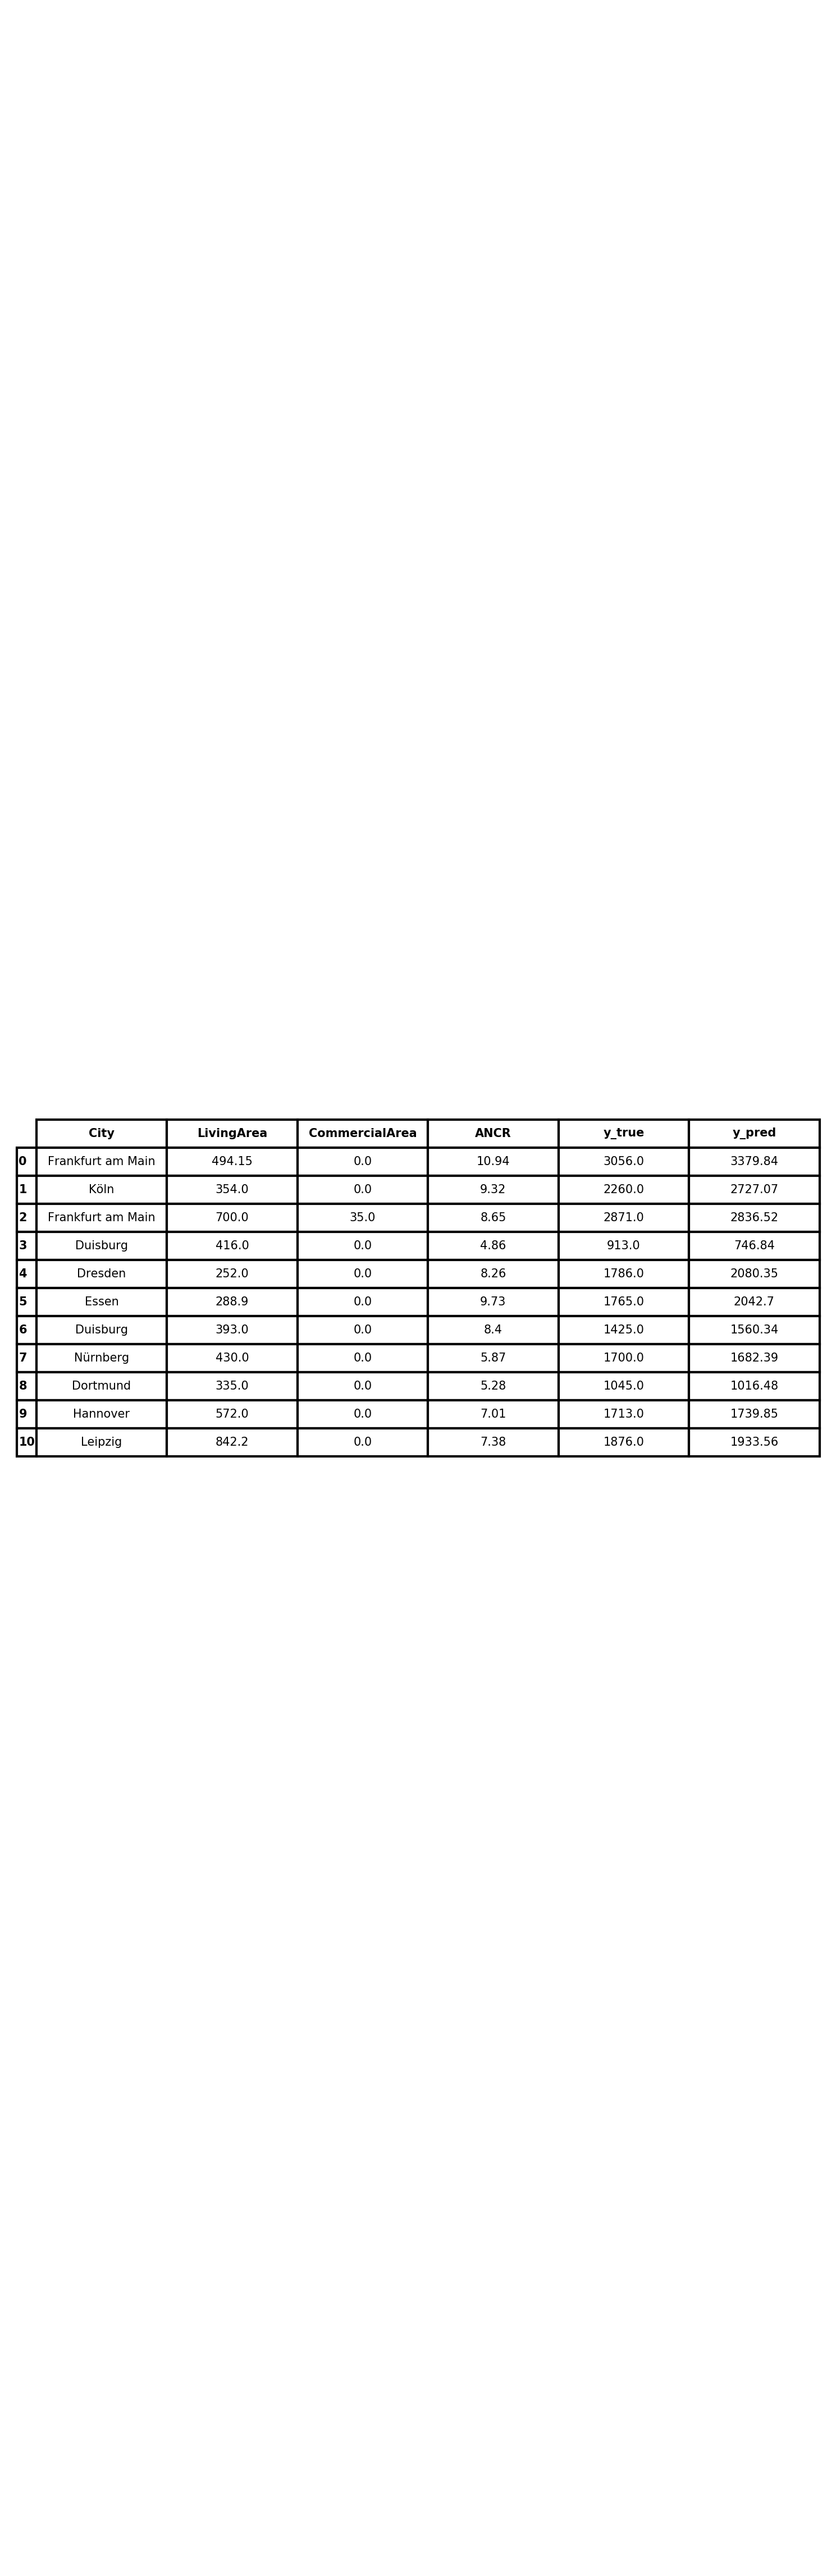

In [191]:
plotTable([6, 20], short_pred_Lasso, 'Table8.png', 300)

In [192]:
predictionsLasso.head()

,LivingArea,CommercialArea,ANCA,DCF_Price,AMP,MaintenanceReserve,Capex,Market_sqm,Leerstandsquote,City,Province,y_true,y_pred
0,494.15,0.0,131.28,3056.0,176.28,11.0,10.0,3250.0,0.3,Frankfurt am Main,Hessen,3056.0,3379.835139
1,354.00,0.0,111.84,2260.0,131.40,12.0,11.0,2550.0,1.0,Köln,NRW,2260.0,2727.074906
2,700.00,35.0,103.80,2871.0,176.16,11.0,10.0,3250.0,0.3,Frankfurt am Main,Hessen,2871.0,2836.521559
3,416.00,0.0,58.32,913.0,77.28,11.0,10.0,1050.0,4.3,Duisburg,NRW,913.0,746.835272
4,252.00,0.0,99.12,1786.0,85.60,11.0,11.0,1975.0,1.6,Dresden,Sachsen,1786.0,2080.351026


In [193]:
test_results = finalResults([8.52, 9.43], [0.87, 0.88])

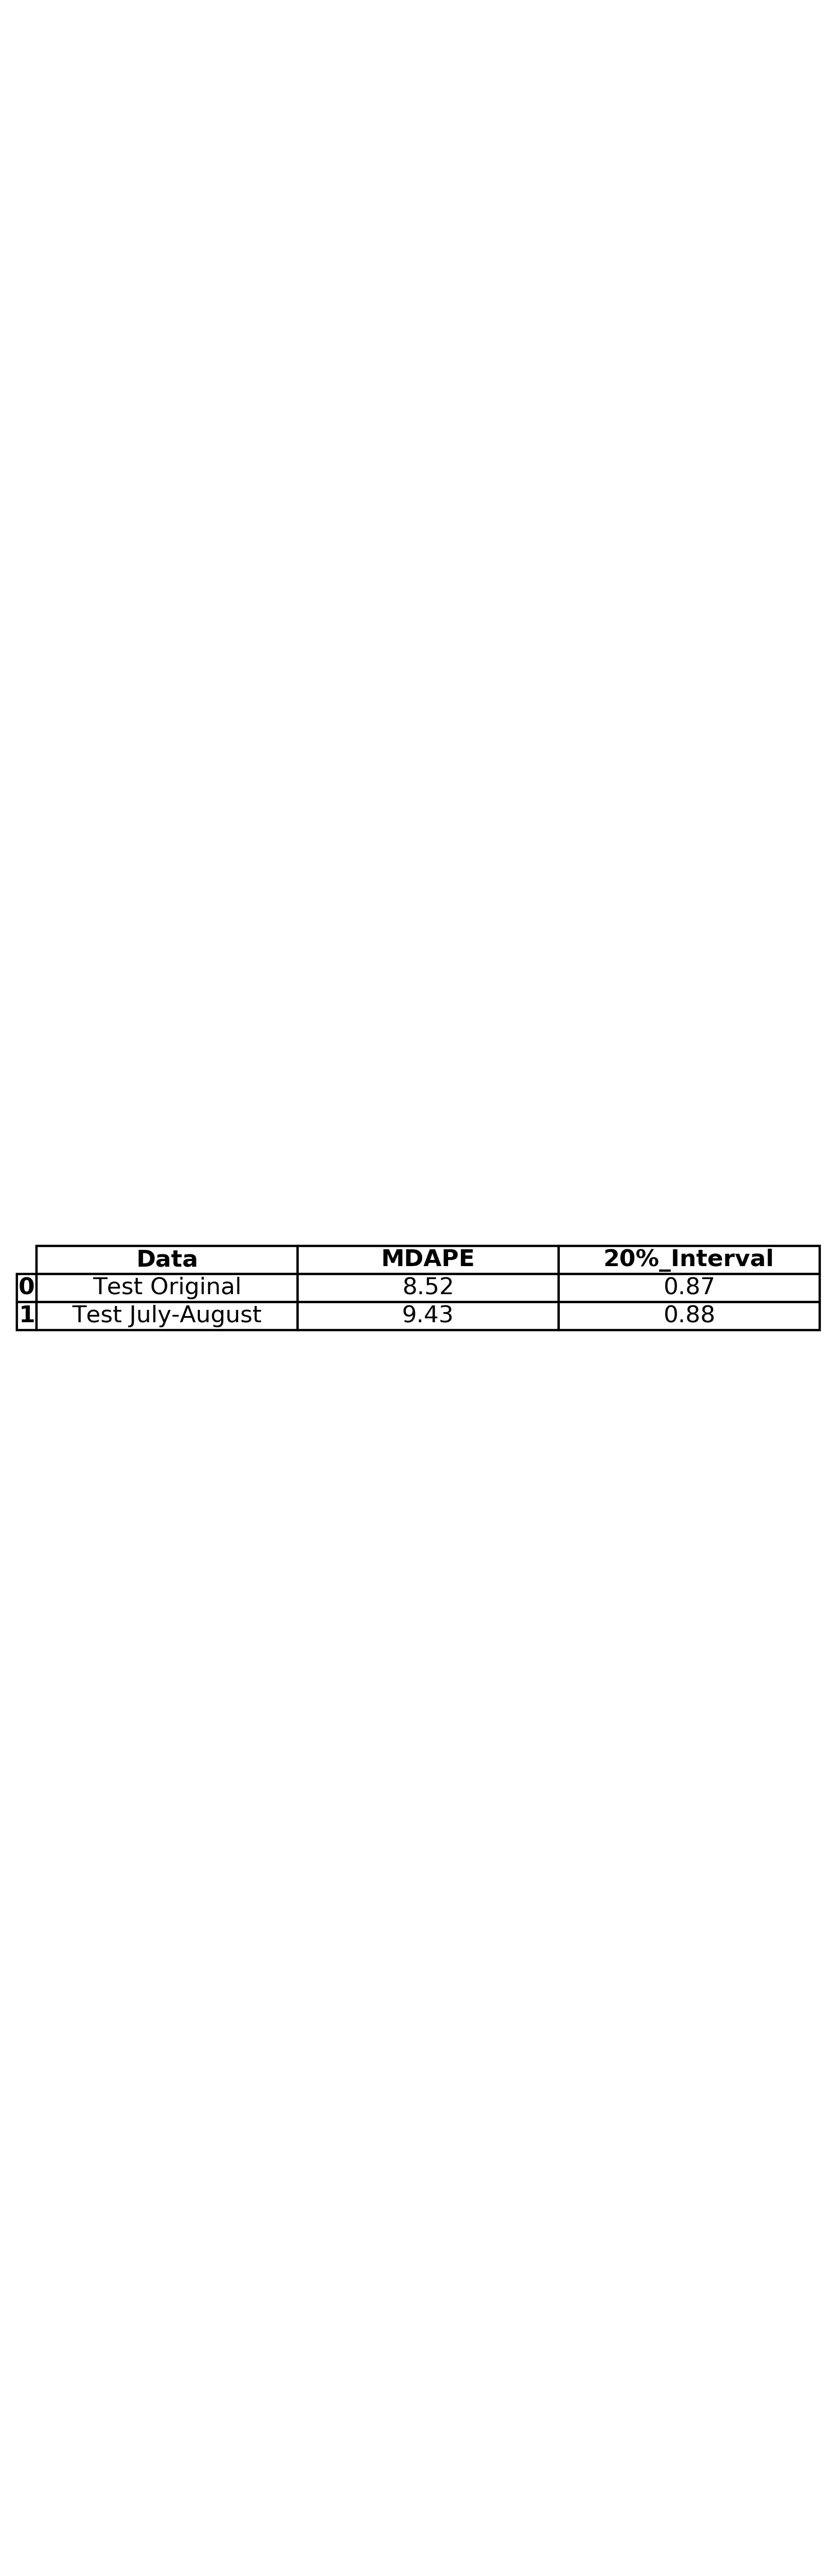

In [194]:
plotTable([6, 20], test_results, 'Table9.png', 300)